In [11]:
!python3 calculate.py

0.0 42.0
40.0 13.0
25.0 -34.0
-25.0 -34.0
-40.0 13.0


In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math


#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs
import xmltodict

import imgaug as ia
from imgaug import augmenters as iaa
import math



import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Softmax
from keras.preprocessing import sequence
!pip install pascal-voc-writer
from pascal_voc_writer import Writer

Using TensorFlow backend.


In [9]:
# df2 = pd.read_excel("evaluations_new.xlsx", 'Sheet2')
# df2.head(10)

In [1]:
# !pip install xlrd
# import pandas as pd
# import numpy as np
# df2 = pd.read_excel("evaluations_new.xlsx", 'Sheet3')


# #df2['elevation(degrees)']=round(np.degrees(np.arctan2(df2['y_predicted(cm)'],df2['z_predicted(cm)'])),2)
# df2['distance_grnd(metres)'] = np.sqrt(df2['x_grnd(cm)']*df2['x_grnd(cm)']+df2['y_grnd(cm)']*df2['y_grnd(cm)']+df2['z_grnd(cm)']*df2['z_grnd(cm)'])/100
# df2['heading_grnd(deg)'] = round(np.degrees(np.arctan2(df2['x_grnd(cm)'],df2['z_grnd(cm)'])),2)
# df2['elevation_grnd(deg)'] = round(np.degrees(np.arctan2(df2['y_grnd(cm)'],df2['z_grnd(cm)'])),2)

# df2.to_csv('evaluations_new.csv')

In [2]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            #self.model.save_weights(filepath, overwrite=True)
                            print("asd")
                            try:
                                with open(filepath,'wb') as f:
                                    pickle.dump(self.model.get_weights(),f)
                            except Exception as ex:
                                print("Could not write",ex)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + keras.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + keras.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+keras.backend.epsilon()))

In [3]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3716668319851437164, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11376889377218485919
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17242600431364797801
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5534121984
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6778619355892194759
 physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [5]:
def process_image_keypoints(img,bbox_coords):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    bbox_coordinates = []
    for a,b in bbox_coords:
        a = float(a)*ratio
        b = float(b)*ratio
        bbox_coordinates.append([a+left,b+top])
    return new_im,bbox_coordinates

In [6]:
def process_image_keypoints_nobox(img):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [7]:
def process_image_keypoints_nobox2(img):
    desired_size = 448

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [11]:
count_correct = 0
count_wrong = 0
images = []
bboxes = []
image_sizes = []
image_names = []

dir_list = []

dir_list = ['/tf/data/bigger_annotations/','/tf/data/stream5_testing_annotations/']

for folder in dir_list:
    for file in os.listdir(folder):
        try:
            with open(folder+file,'r') as f:
                text = f.read()
                d = xmltodict.parse(text)
            path = d['annotation']['path']
            rel_path = "/home/parmeet1992/Pictures/"

            path = path.split(rel_path)[1]
            path = "/tf/data/" + path
            bgr_img = cv2.imread(path)
            img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

            obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
            bbox = obj['bndbox']                
            bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


            img,bbox_coords = process_image_keypoints(img,bbox_coords)
            bbs = ia.BoundingBoxesOnImage([
                ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
            ], shape=img.shape)

            images.append(img)
            bboxes.append(bbs)
            count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

In [12]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        #iaa.Flipud(0.5), # vertically flip 50% of all images
        sometimes(iaa.Affine(
            translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)}, # translate by -20 to +20 percent (per axis)
            #rotate=(-5, 5), # rotate by -45 to +45 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        iaa.SomeOf((0, 5),
            [
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [13]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes





X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.20,random_state=42,shuffle=True)
test_bboxes = []
for bbs in list(y_test):
    test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
train_images,train_bboxes = augment_images(X_train,y_train,3)

In [15]:
# idx = idx + 1
# plt.imshow(train_images[idx])

In [16]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(64, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = Reshape((4,),name='localization_output')(x)


model = Model(inputs=cnn_base.input, outputs=x)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy',iou_metric])
initial_weights = model.get_weights()

W0409 20:17:54.907234 140164964910848 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
try:
    with open('vgg16-docker-box-weights13.hd5','rb') as f:
        model_weights = pickle.load(f)
        model.set_weights(model_weights)
        print("loaded weights")
except:
    print("not present")
checkpoint = CustomModelCheckpoint('vgg16-docker-box-weights13.hd5', monitor='val_iou_metric', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
callbacks_list = [checkpoint]
history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=40,batch_size=5,callbacks=callbacks_list)

not present
Train on 824 samples, validate on 52 samples
Epoch 1/40
824/824 [==============================] - 15s 19ms/step - loss: 13836.1972 - acc: 0.3641 - iou_metric: 0.3116 - val_loss: 13439.7742 - val_acc: 0.2692 - val_iou_metric: 0.2798

Epoch 00001: val_iou_metric improved from -inf to 0.27976, saving model to vgg16-docker-box-weights13.hd5
asd
Epoch 2/40
824/824 [==============================] - 11s 14ms/step - loss: 12436.7086 - acc: 0.4078 - iou_metric: 0.2508 - val_loss: 10721.1790 - val_acc: 0.3846 - val_iou_metric: 0.1797

Epoch 00002: val_iou_metric did not improve from 0.27976
Epoch 3/40
824/824 [==============================] - 12s 14ms/step - loss: 9730.2285 - acc: 0.4466 - iou_metric: 0.2313 - val_loss: 8601.8958 - val_acc: 0.4231 - val_iou_metric: 0.2345

Epoch 00003: val_iou_metric did not improve from 0.27976
Epoch 4/40
824/824 [==============================] - 12s 14ms/step - loss: 6456.0993 - acc: 0.5437 - iou_metric: 0.2266 - val_loss: 5023.0869 - val_acc: 


Epoch 00032: val_iou_metric did not improve from 0.73925
Epoch 33/40
824/824 [==============================] - 13s 15ms/step - loss: 251.7504 - acc: 0.7913 - iou_metric: 0.4949 - val_loss: 60.3399 - val_acc: 0.9808 - val_iou_metric: 0.7264

Epoch 00033: val_iou_metric did not improve from 0.73925
Epoch 34/40
824/824 [==============================] - 13s 15ms/step - loss: 220.9585 - acc: 0.8010 - iou_metric: 0.5161 - val_loss: 82.1105 - val_acc: 0.8846 - val_iou_metric: 0.6943

Epoch 00034: val_iou_metric did not improve from 0.73925
Epoch 35/40
824/824 [==============================] - 13s 15ms/step - loss: 247.9261 - acc: 0.7803 - iou_metric: 0.4995 - val_loss: 62.5800 - val_acc: 0.9615 - val_iou_metric: 0.7414

Epoch 00035: val_iou_metric improved from 0.73925 to 0.74138, saving model to vgg16-docker-box-weights13.hd5
asd
Epoch 36/40
824/824 [==============================] - 13s 15ms/step - loss: 218.9254 - acc: 0.8058 - iou_metric: 0.5150 - val_loss: 77.5239 - val_acc: 0.9423 -

In [19]:
with open('vgg16-docker-box-weights13.hd5','rb') as f:
    model_weights = pickle.load(f)
    model.set_weights(model_weights)
    print("loaded weights")

loaded weights


In [11]:
# import cv2
# import numpy as np
# import sys
# import time    
# import os


# import cv2
# skip = 1

# vidcap = cv2.VideoCapture('/tf/data/bigger.mp4')
# success,image = vidcap.read()
# count = 0
# success = True
# path = "/tf/data/bigger"
# path2 = "/tf/data/bigger_predicted2"
# print(path)
# try:
#     os.mkdir(path);
# except:
#     print("exsits")
# try:
#     os.mkdir(path2);    
# except:
#     print("exsits")
# while success:
#     #try:
#         count += 1
#         string = "/tf/data/bigger_predicted2/"+str(count)+".jpg"  
#         print(string)

#         img_temp,corr = process_image_keypoints_nobox(image)
#         img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)

#         [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
#         [left,top,ratio] = corr
#         xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
#         ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            

#         img = image[int(ymin):int(ymax),int(xmin):int(xmax),:]
#         gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         ret,th1 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

#         pt1 = (int(xmin),int(ymin))
#         pt2 = (int(xmax),int(ymax))
#         image = cv2.rectangle(image,pt1,pt2,(0,255,255),thickness=2)

#         tuples = []
#         contour_count = 0
#         exception_count = 0
#         contours,hierachy = cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#         print(len(contours))
#         for c in contours:
#             # calculate moments for each contour
#             try:
#                 M = cv2.moments(c)

#                 # calculate x,y coordinate of center
#                 cX = int(M["m10"] / M["m00"])
#                 cY = int(M["m01"] / M["m00"])
#                 tuples.append((cX+int(xmin),cY+int(ymin)))
#                 contour_count = contour_count + 1
#             except:
#                 exception_count = exception_count + 1        
#         final_tuples = []
#         countour5_flag = False
#         if contour_count>5:
#             from sklearn.cluster import KMeans
#             kmeans = KMeans(n_clusters=5, random_state=0).fit(tuples)
#             for tup in kmeans.cluster_centers_:
#                 image = cv2.circle(image,(int(tup[0]),int(tup[1])), 5, (255,0,0), -1)
#                 final_tuples.append((int(tup[0]),int(tup[1])))
#             print("asdas")
#             countour5_flag = True
#         else:
#             if len(tuples)==5:
#                 countour5_flag = True
#             else:
#                 countour5_flag = False
#             for tup in tuples:
#                 image = cv2.circle(image,(tup[0],tup[1]), 5, (255,0,0), -1)
#                 final_tuples.append(tup)
                
#             print("aaaaaaaaaaaaaa")
            
# #         if count%skip==0:
#         print(final_tuples)
#         if countour5_flag==True:
#             image_points = final_tuples
#             image_points = np.array(sorted(image_points, key=lambda tup: tup[0]),dtype="double")

#             #print(sorted_by_first)
#             # 3D model points.
#             model_points = np.array([
#                                         (-40, 13, 0.0),
#                                         (-25,-34, 0.0),
#                                         (0, 42, 0.0), 
#                                         (25,-34, 0.0),
#                                         (40,13, 0.0)
#                                     ])


#             # Camera internals

#             size = image.shape
#             focal_length = size[1]
#             center = (size[1]/2, size[0]/2)
#             camera_matrix = np.array(
#                                      [[focal_length, 0, center[0]],
#                                      [0, focal_length, center[1]],
#                                      [0, 0, 1]], dtype = "double"
#                                      )

#             #print "Camera Matrix :\n {0}".format(camera_matrix)

#             dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
#             (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.cv2.SOLVEPNP_ITERATIVE)

#             #print "Rotation Vector:\n {0}".format(rotation_vector)
#             #print "Translation Vector:\n {0}".format(translation_vector)


#             # Project a 3D point (0, 0, 1000.0) onto the image plane.
#             # We use this to draw a line sticking out of the nose


#             (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

#     #         for p in image_points:
#     #             cv2.circle(image, (int(p[0]), int(p[1])), 3, (0,0,255), -1)

#             print(rotation_vector)
#             print(translation_vector)

#             text= str(round(translation_vector[0][0],1))+","+str(round(translation_vector[1][0],1))+","+str(round(translation_vector[2][0],1))
#             cv2.putText(image,text,(40,40), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,0,0),5,cv2.LINE_AA)

#             p1 = ( int(image_points[0][0]), int(image_points[0][1]))
#             p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

#             cv2.line(image, p1, p2, (255,0,0), 2)
#             plt.imshow(image)
#             cv2.imwrite(string, image)
        
#         #break
#         success,image = vidcap.read()
#         print('Read a new frame: ', success)
#     #except Exception as ex:
#     #    print(ex)

In [12]:
# bgr_img = cv2.imread("/tf/data/bigger/502.jpg")
# img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
# img_temp,corr = process_image_keypoints_nobox(img)
# img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)

# [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
# [left,top,ratio] = corr
# xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
# ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            

# img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,th1 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
# plt.imshow(th1)

# tuples = []
        
# # find contours in the binary image
# contours,hierachy = cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# for c in contours:
#     # calculate moments for each contour
#     M = cv2.moments(c)
 
#     # calculate x,y coordinate of center
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
#     cv2.circle(img,(int(cX),int(cY)), 5, (255,0,0), -1)
#     tuples.append((int(cX),int(cY)))
# plt.imshow(img)

In [13]:
# #string = "/tf/data/bigger_predicted2/"+str(count)+".jpg"  
# #print(string)
# bgr_img = cv2.imread("/tf/data/bigger/504.jpg")
# img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
# img_temp,corr = process_image_keypoints_nobox(img)
# img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)

# [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
# [left,top,ratio] = corr
# xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
# ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            

# img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,th1 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

# pt1 = (int(xmin),int(ymin))
# pt2 = (int(xmax),int(ymax))
# image = cv2.rectangle(image,pt1,pt2,(0,255,255),thickness=2)

# tuples = []
# contour_count = 0
# exception_count = 0
# contours,hierachy = cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# for c in contours:
#     # calculate moments for each contour
#     try:
#         M = cv2.moments(c)

#         # calculate x,y coordinate of center
#         cX = int(M["m10"] / M["m00"])
#         cY = int(M["m01"] / M["m00"])
#         tuples.append((cX+int(xmin),cY+int(ymin)))
#         contour_count = contour_count + 1
#     except:
#         exception_count = exception_count + 1        
# if contour_count>5:
#     from sklearn.cluster import KMeans
#     kmeans = KMeans(n_clusters=5, random_state=0).fit(tuples)
#     for tup in kmeans.cluster_centers_:
#         image = cv2.circle(image,(int(tup[0]),int(tup[1])), 5, (255,0,0), -1)
# else:
#     for tup in tuples:
#         image = cv2.circle(image,(tup[0],tup[1]), 5, (255,0,0), -1)

# plt.imshow(image)
# #cv2.imwrite(string, image)

In [94]:
len(contours)

5

In [17]:
# # define range of blue color in HSV
# lower_blue = np.array([110,50,50])
# upper_blue = np.array([130,255,255])

# # Threshold the HSV image to get only blue colors
# mask = cv2.inRange(hsv, lower_blue, upper_blue)

# # Bitwise-AND mask and original image
# res = cv2.bitwise_and(frame,frame, mask= mask)

In [14]:
# import cv2
# import numpy as np
# import glob
 
# img_array = []
# for i in range(4000):
#     print(i)
#     try:
#         img = cv2.imread('/tf/data/bigger_predicted2/'+str(i+1)+".jpg")
#         height, width, layers = img.shape
#         size = (width,height)
#         img_array.append(img)
#     except:
#         print("not present")
 
 
# out = cv2.VideoWriter('/tf/data/prediction_video2.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
# for i in range(len(img_array)):
#     out.write(img_array[i])
# out.release()

In [15]:
# sometimes = lambda aug: iaa.Sometimes(0.5, aug)
# seq = iaa.Sequential(
#     [
#         iaa.Fliplr(0.5), # horizontally flip 50% of all images
#         iaa.Flipud(0.5), # vertically flip 50% of all images
#         sometimes(iaa.Affine(
#             translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)}, # translate by -20 to +20 percent (per axis)
#             #rotate=(-5, 5), # rotate by -45 to +45 degrees
#             order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
#             cval=(0, 255), # if mode is constant, use a cval between 0 and 255
#             mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
#         )),
#         iaa.SomeOf((0, 5),
#             [
#                 iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
#                 #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
#                 iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
#             ],
#             random_order=True
#         )
#     ],
#     random_order=True
# )

In [8]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(64, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = Reshape((4,),name='localization_output')(x)


model = Model(inputs=cnn_base.input, outputs=x)
sgd = keras.optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="mean_squared_error", optimizer=sgd, metrics=['accuracy',iou_metric])
initial_weights = model.get_weights()

58892288/58889256 [==============================] - 5s 0us/step


W0407 21:51:43.812481 140386937091840 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
count_correct = 0
count_wrong = 0
images = []
bboxes = []
image_sizes = []
image_names = []
for file in os.listdir("/tf/data/stream2_annnotations/"):
    try:
        with open('/tf/data/stream2_annnotations/'+file,'r') as f:
            text = f.read()
            d = xmltodict.parse(text)
        path = d['annotation']['path']
        rel_path = "/home/parmeet1992/Pictures/"
        
        path = path.split(rel_path)[1]
        path = "/tf/data/" + path
        bgr_img = cv2.imread(path)
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        
        obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
        bbox = obj['bndbox']                
        bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


        img,bbox_coords = process_image_keypoints(img,bbox_coords)
        bbs = ia.BoundingBoxesOnImage([
            ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
        ], shape=img.shape)

        images.append(img)
        bboxes.append(bbs)
        count_correct += 1
    except Exception as ex:
        print(ex)
        count_wrong += 1

In [13]:
len(bboxes)

248

In [29]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes





X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.20,random_state=42,shuffle=True)
test_bboxes = []
for bbs in list(y_test):
    test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
train_images,train_bboxes = augment_images(X_train,y_train,3)

In [18]:
try:
    with open('vgg16-docker-box-weights-underwater-camera.hd5','rb') as f:
        model_weights = pickle.load(f)
        model.set_weights(model_weights)
        print("loaded weights")
except:
    print("not present")
checkpoint = CustomModelCheckpoint('vgg16-docker-box-weights-underwater-camera.hd5', monitor='val_iou_metric', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
callbacks_list = [checkpoint]
history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=40,batch_size=5,callbacks=callbacks_list)

loaded weights


NameError: name 'train_images' is not defined

In [10]:
with open('vgg16-docker-box-weights-underwater-camera.hd5','rb') as f:
    model_weights = pickle.load(f)
    model.set_weights(model_weights)
    print("loaded weights")

loaded weights


In [24]:
import cv2
import numpy as np
import sys
import time    
import os


import cv2
skip = 1

vidcap = cv2.VideoCapture('/tf/data/stream3.mp4')
success,image = vidcap.read()
count = 0
success = True
#path = "/tf/data/bigger"
path = "/tf/data/stream_images_final"
print(path)
try:
    os.mkdir(path);
except:
    print("exsits")
while success:
    try:
        count += 1
        string = "/tf/data/stream_images_final/"+str(count)+".jpg"
        string_path = "/tf/data/stream_images_final2/"+str(count)+".jpg"
        annotation_path = "/tf/data/stream_images_final_annotations/"+str(count)+".xml"
        print(string)

        img_temp,corr = process_image_keypoints_nobox(image)
        writer = Writer(string, image.shape[1], image.shape[0])

        cv2.imwrite("/tf/data/stream_images_final/"+str(count)+".jpg", image)
        img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
        

        [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
        [left,top,ratio] = corr
        xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
        ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            

        img = image[int(ymin):int(ymax),int(xmin):int(xmax),:]
        
        pt1 = (int(xmin),int(ymin))
        pt2 = (int(xmax),int(ymax))
        image = cv2.rectangle(image,pt1,pt2,(0,255,255),thickness=2)
        
        cv2.imwrite(string_path, image)
        writer.addObject('station', xmin, ymin, xmax, ymax)

        
        writer.save(annotation_path)
        #break
        
    except Exception as ex:
        print(ex)
    success,image = vidcap.read()
    print('Read a new frame: ', success)

/tf/data/stream_images_final
exsits
/tf/data/stream_images_final/1.jpg
Read a new frame:  True
/tf/data/stream_images_final/2.jpg
Read a new frame:  True
/tf/data/stream_images_final/3.jpg
Read a new frame:  True
/tf/data/stream_images_final/4.jpg
Read a new frame:  True
/tf/data/stream_images_final/5.jpg
Read a new frame:  True
/tf/data/stream_images_final/6.jpg
Read a new frame:  True
/tf/data/stream_images_final/7.jpg
Read a new frame:  True
/tf/data/stream_images_final/8.jpg
Read a new frame:  True
/tf/data/stream_images_final/9.jpg
Read a new frame:  True
/tf/data/stream_images_final/10.jpg
Read a new frame:  True
/tf/data/stream_images_final/11.jpg
Read a new frame:  True
/tf/data/stream_images_final/12.jpg
Read a new frame:  True
/tf/data/stream_images_final/13.jpg
Read a new frame:  True
/tf/data/stream_images_final/14.jpg
Read a new frame:  True
/tf/data/stream_images_final/15.jpg
Read a new frame:  True
/tf/data/stream_images_final/16.jpg
Read a new frame:  True
/tf/data/stre

Read a new frame:  True
/tf/data/stream_images_final/144.jpg
Read a new frame:  True
/tf/data/stream_images_final/145.jpg
Read a new frame:  True
/tf/data/stream_images_final/146.jpg
Read a new frame:  True
/tf/data/stream_images_final/147.jpg
Read a new frame:  True
/tf/data/stream_images_final/148.jpg
Read a new frame:  True
/tf/data/stream_images_final/149.jpg
Read a new frame:  True
/tf/data/stream_images_final/150.jpg
Read a new frame:  True
/tf/data/stream_images_final/151.jpg
Read a new frame:  True
/tf/data/stream_images_final/152.jpg
Read a new frame:  True
/tf/data/stream_images_final/153.jpg
Read a new frame:  True
/tf/data/stream_images_final/154.jpg
Read a new frame:  True
/tf/data/stream_images_final/155.jpg
Read a new frame:  True
/tf/data/stream_images_final/156.jpg
Read a new frame:  True
/tf/data/stream_images_final/157.jpg
Read a new frame:  True
/tf/data/stream_images_final/158.jpg
Read a new frame:  True
/tf/data/stream_images_final/159.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/280.jpg
Read a new frame:  True
/tf/data/stream_images_final/281.jpg
Read a new frame:  True
/tf/data/stream_images_final/282.jpg
Read a new frame:  True
/tf/data/stream_images_final/283.jpg
Read a new frame:  True
/tf/data/stream_images_final/284.jpg
Read a new frame:  True
/tf/data/stream_images_final/285.jpg
Read a new frame:  True
/tf/data/stream_images_final/286.jpg
Read a new frame:  True
/tf/data/stream_images_final/287.jpg
Read a new frame:  True
/tf/data/stream_images_final/288.jpg
Read a new frame:  True
/tf/data/stream_images_final/289.jpg
Read a new frame:  True
/tf/data/stream_images_final/290.jpg
Read a new frame:  True
/tf/data/stream_images_final/291.jpg
Read a new frame:  True
/tf/data/stream_images_final/292.jpg
Read a new frame:  True
/tf/data/stream_images_final/293.jpg
Read a new frame:  True
/tf/data/stream_images_final/294.jpg
Read a new frame:  True
/tf/data/stream_images_final/295.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/421.jpg
Read a new frame:  True
/tf/data/stream_images_final/422.jpg
Read a new frame:  True
/tf/data/stream_images_final/423.jpg
Read a new frame:  True
/tf/data/stream_images_final/424.jpg
Read a new frame:  True
/tf/data/stream_images_final/425.jpg
Read a new frame:  True
/tf/data/stream_images_final/426.jpg
Read a new frame:  True
/tf/data/stream_images_final/427.jpg
Read a new frame:  True
/tf/data/stream_images_final/428.jpg
Read a new frame:  True
/tf/data/stream_images_final/429.jpg
Read a new frame:  True
/tf/data/stream_images_final/430.jpg
Read a new frame:  True
/tf/data/stream_images_final/431.jpg
Read a new frame:  True
/tf/data/stream_images_final/432.jpg
Read a new frame:  True
/tf/data/stream_images_final/433.jpg
Read a new frame:  True
/tf/data/stream_images_final/434.jpg
Read a new frame:  True
/tf/data/stream_images_final/435.jpg
Read a new frame:  True
/tf/data/stream_images_final/436.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/561.jpg
Read a new frame:  True
/tf/data/stream_images_final/562.jpg
Read a new frame:  True
/tf/data/stream_images_final/563.jpg
Read a new frame:  True
/tf/data/stream_images_final/564.jpg
Read a new frame:  True
/tf/data/stream_images_final/565.jpg
Read a new frame:  True
/tf/data/stream_images_final/566.jpg
Read a new frame:  True
/tf/data/stream_images_final/567.jpg
Read a new frame:  True
/tf/data/stream_images_final/568.jpg
Read a new frame:  True
/tf/data/stream_images_final/569.jpg
Read a new frame:  True
/tf/data/stream_images_final/570.jpg
Read a new frame:  True
/tf/data/stream_images_final/571.jpg
Read a new frame:  True
/tf/data/stream_images_final/572.jpg
Read a new frame:  True
/tf/data/stream_images_final/573.jpg
Read a new frame:  True
/tf/data/stream_images_final/574.jpg
Read a new frame:  True
/tf/data/stream_images_final/575.jpg
Read a new frame:  True
/tf/data/stream_images_final/576.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/700.jpg
Read a new frame:  True
/tf/data/stream_images_final/701.jpg
Read a new frame:  True
/tf/data/stream_images_final/702.jpg
Read a new frame:  True
/tf/data/stream_images_final/703.jpg
Read a new frame:  True
/tf/data/stream_images_final/704.jpg
Read a new frame:  True
/tf/data/stream_images_final/705.jpg
Read a new frame:  True
/tf/data/stream_images_final/706.jpg
Read a new frame:  True
/tf/data/stream_images_final/707.jpg
Read a new frame:  True
/tf/data/stream_images_final/708.jpg
Read a new frame:  True
/tf/data/stream_images_final/709.jpg
Read a new frame:  True
/tf/data/stream_images_final/710.jpg
Read a new frame:  True
/tf/data/stream_images_final/711.jpg
Read a new frame:  True
/tf/data/stream_images_final/712.jpg
Read a new frame:  True
/tf/data/stream_images_final/713.jpg
Read a new frame:  True
/tf/data/stream_images_final/714.jpg
Read a new frame:  True
/tf/data/stream_images_final/715.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/840.jpg
Read a new frame:  True
/tf/data/stream_images_final/841.jpg
Read a new frame:  True
/tf/data/stream_images_final/842.jpg
Read a new frame:  True
/tf/data/stream_images_final/843.jpg
Read a new frame:  True
/tf/data/stream_images_final/844.jpg
Read a new frame:  True
/tf/data/stream_images_final/845.jpg
Read a new frame:  True
/tf/data/stream_images_final/846.jpg
Read a new frame:  True
/tf/data/stream_images_final/847.jpg
Read a new frame:  True
/tf/data/stream_images_final/848.jpg
Read a new frame:  True
/tf/data/stream_images_final/849.jpg
Read a new frame:  True
/tf/data/stream_images_final/850.jpg
Read a new frame:  True
/tf/data/stream_images_final/851.jpg
Read a new frame:  True
/tf/data/stream_images_final/852.jpg
Read a new frame:  True
/tf/data/stream_images_final/853.jpg
Read a new frame:  True
/tf/data/stream_images_final/854.jpg
Read a new frame:  True
/tf/data/stream_images_final/855.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/980.jpg
Read a new frame:  True
/tf/data/stream_images_final/981.jpg
Read a new frame:  True
/tf/data/stream_images_final/982.jpg
Read a new frame:  True
/tf/data/stream_images_final/983.jpg
Read a new frame:  True
/tf/data/stream_images_final/984.jpg
Read a new frame:  True
/tf/data/stream_images_final/985.jpg
Read a new frame:  True
/tf/data/stream_images_final/986.jpg
Read a new frame:  True
/tf/data/stream_images_final/987.jpg
Read a new frame:  True
/tf/data/stream_images_final/988.jpg
Read a new frame:  True
/tf/data/stream_images_final/989.jpg
Read a new frame:  True
/tf/data/stream_images_final/990.jpg
Read a new frame:  True
/tf/data/stream_images_final/991.jpg
Read a new frame:  True
/tf/data/stream_images_final/992.jpg
Read a new frame:  True
/tf/data/stream_images_final/993.jpg
Read a new frame:  True
/tf/data/stream_images_final/994.jpg
Read a new frame:  True
/tf/data/stream_images_final/995.jpg
Read a new frame:  True


Read a new frame:  True
/tf/data/stream_images_final/1113.jpg
Read a new frame:  True
/tf/data/stream_images_final/1114.jpg
Read a new frame:  True
/tf/data/stream_images_final/1115.jpg
Read a new frame:  True
/tf/data/stream_images_final/1116.jpg
Read a new frame:  True
/tf/data/stream_images_final/1117.jpg
Read a new frame:  True
/tf/data/stream_images_final/1118.jpg
Read a new frame:  True
/tf/data/stream_images_final/1119.jpg
Read a new frame:  True
/tf/data/stream_images_final/1120.jpg
Read a new frame:  True
/tf/data/stream_images_final/1121.jpg
Read a new frame:  True
/tf/data/stream_images_final/1122.jpg
Read a new frame:  True
/tf/data/stream_images_final/1123.jpg
Read a new frame:  True
/tf/data/stream_images_final/1124.jpg
Read a new frame:  True
/tf/data/stream_images_final/1125.jpg
Read a new frame:  True
/tf/data/stream_images_final/1126.jpg
Read a new frame:  True
/tf/data/stream_images_final/1127.jpg
Read a new frame:  True
/tf/data/stream_images_final/1128.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1246.jpg
Read a new frame:  True
/tf/data/stream_images_final/1247.jpg
Read a new frame:  True
/tf/data/stream_images_final/1248.jpg
Read a new frame:  True
/tf/data/stream_images_final/1249.jpg
Read a new frame:  True
/tf/data/stream_images_final/1250.jpg
Read a new frame:  True
/tf/data/stream_images_final/1251.jpg
Read a new frame:  True
/tf/data/stream_images_final/1252.jpg
Read a new frame:  True
/tf/data/stream_images_final/1253.jpg
Read a new frame:  True
/tf/data/stream_images_final/1254.jpg
Read a new frame:  True
/tf/data/stream_images_final/1255.jpg
Read a new frame:  True
/tf/data/stream_images_final/1256.jpg
Read a new frame:  True
/tf/data/stream_images_final/1257.jpg
Read a new frame:  True
/tf/data/stream_images_final/1258.jpg
Read a new frame:  True
/tf/data/stream_images_final/1259.jpg
Read a new frame:  True
/tf/data/stream_images_final/1260.jpg
Read a new frame:  True
/tf/data/stream_images_final/1261.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1380.jpg
Read a new frame:  True
/tf/data/stream_images_final/1381.jpg
Read a new frame:  True
/tf/data/stream_images_final/1382.jpg
Read a new frame:  True
/tf/data/stream_images_final/1383.jpg
Read a new frame:  True
/tf/data/stream_images_final/1384.jpg
Read a new frame:  True
/tf/data/stream_images_final/1385.jpg
Read a new frame:  True
/tf/data/stream_images_final/1386.jpg
Read a new frame:  True
/tf/data/stream_images_final/1387.jpg
Read a new frame:  True
/tf/data/stream_images_final/1388.jpg
Read a new frame:  True
/tf/data/stream_images_final/1389.jpg
Read a new frame:  True
/tf/data/stream_images_final/1390.jpg
Read a new frame:  True
/tf/data/stream_images_final/1391.jpg
Read a new frame:  True
/tf/data/stream_images_final/1392.jpg
Read a new frame:  True
/tf/data/stream_images_final/1393.jpg
Read a new frame:  True
/tf/data/stream_images_final/1394.jpg
Read a new frame:  True
/tf/data/stream_images_final/1395.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1513.jpg
Read a new frame:  True
/tf/data/stream_images_final/1514.jpg
Read a new frame:  True
/tf/data/stream_images_final/1515.jpg
Read a new frame:  True
/tf/data/stream_images_final/1516.jpg
Read a new frame:  True
/tf/data/stream_images_final/1517.jpg
Read a new frame:  True
/tf/data/stream_images_final/1518.jpg
Read a new frame:  True
/tf/data/stream_images_final/1519.jpg
Read a new frame:  True
/tf/data/stream_images_final/1520.jpg
Read a new frame:  True
/tf/data/stream_images_final/1521.jpg
Read a new frame:  True
/tf/data/stream_images_final/1522.jpg
Read a new frame:  True
/tf/data/stream_images_final/1523.jpg
Read a new frame:  True
/tf/data/stream_images_final/1524.jpg
Read a new frame:  True
/tf/data/stream_images_final/1525.jpg
Read a new frame:  True
/tf/data/stream_images_final/1526.jpg
Read a new frame:  True
/tf/data/stream_images_final/1527.jpg
Read a new frame:  True
/tf/data/stream_images_final/1528.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1646.jpg
Read a new frame:  True
/tf/data/stream_images_final/1647.jpg
Read a new frame:  True
/tf/data/stream_images_final/1648.jpg
Read a new frame:  True
/tf/data/stream_images_final/1649.jpg
Read a new frame:  True
/tf/data/stream_images_final/1650.jpg
Read a new frame:  True
/tf/data/stream_images_final/1651.jpg
Read a new frame:  True
/tf/data/stream_images_final/1652.jpg
Read a new frame:  True
/tf/data/stream_images_final/1653.jpg
Read a new frame:  True
/tf/data/stream_images_final/1654.jpg
Read a new frame:  True
/tf/data/stream_images_final/1655.jpg
Read a new frame:  True
/tf/data/stream_images_final/1656.jpg
Read a new frame:  True
/tf/data/stream_images_final/1657.jpg
Read a new frame:  True
/tf/data/stream_images_final/1658.jpg
Read a new frame:  True
/tf/data/stream_images_final/1659.jpg
Read a new frame:  True
/tf/data/stream_images_final/1660.jpg
Read a new frame:  True
/tf/data/stream_images_final/1661.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1779.jpg
Read a new frame:  True
/tf/data/stream_images_final/1780.jpg
Read a new frame:  True
/tf/data/stream_images_final/1781.jpg
Read a new frame:  True
/tf/data/stream_images_final/1782.jpg
Read a new frame:  True
/tf/data/stream_images_final/1783.jpg
Read a new frame:  True
/tf/data/stream_images_final/1784.jpg
Read a new frame:  True
/tf/data/stream_images_final/1785.jpg
Read a new frame:  True
/tf/data/stream_images_final/1786.jpg
Read a new frame:  True
/tf/data/stream_images_final/1787.jpg
Read a new frame:  True
/tf/data/stream_images_final/1788.jpg
Read a new frame:  True
/tf/data/stream_images_final/1789.jpg
Read a new frame:  True
/tf/data/stream_images_final/1790.jpg
Read a new frame:  True
/tf/data/stream_images_final/1791.jpg
Read a new frame:  True
/tf/data/stream_images_final/1792.jpg
Read a new frame:  True
/tf/data/stream_images_final/1793.jpg
Read a new frame:  True
/tf/data/stream_images_final/1794.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/1912.jpg
Read a new frame:  True
/tf/data/stream_images_final/1913.jpg
Read a new frame:  True
/tf/data/stream_images_final/1914.jpg
Read a new frame:  True
/tf/data/stream_images_final/1915.jpg
Read a new frame:  True
/tf/data/stream_images_final/1916.jpg
Read a new frame:  True
/tf/data/stream_images_final/1917.jpg
Read a new frame:  True
/tf/data/stream_images_final/1918.jpg
Read a new frame:  True
/tf/data/stream_images_final/1919.jpg
Read a new frame:  True
/tf/data/stream_images_final/1920.jpg
Read a new frame:  True
/tf/data/stream_images_final/1921.jpg
Read a new frame:  True
/tf/data/stream_images_final/1922.jpg
Read a new frame:  True
/tf/data/stream_images_final/1923.jpg
Read a new frame:  True
/tf/data/stream_images_final/1924.jpg
Read a new frame:  True
/tf/data/stream_images_final/1925.jpg
Read a new frame:  True
/tf/data/stream_images_final/1926.jpg
Read a new frame:  True
/tf/data/stream_images_final/1927.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2045.jpg
Read a new frame:  True
/tf/data/stream_images_final/2046.jpg
Read a new frame:  True
/tf/data/stream_images_final/2047.jpg
Read a new frame:  True
/tf/data/stream_images_final/2048.jpg
Read a new frame:  True
/tf/data/stream_images_final/2049.jpg
Read a new frame:  True
/tf/data/stream_images_final/2050.jpg
Read a new frame:  True
/tf/data/stream_images_final/2051.jpg
Read a new frame:  True
/tf/data/stream_images_final/2052.jpg
Read a new frame:  True
/tf/data/stream_images_final/2053.jpg
Read a new frame:  True
/tf/data/stream_images_final/2054.jpg
Read a new frame:  True
/tf/data/stream_images_final/2055.jpg
Read a new frame:  True
/tf/data/stream_images_final/2056.jpg
Read a new frame:  True
/tf/data/stream_images_final/2057.jpg
Read a new frame:  True
/tf/data/stream_images_final/2058.jpg
Read a new frame:  True
/tf/data/stream_images_final/2059.jpg
Read a new frame:  True
/tf/data/stream_images_final/2060.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2179.jpg
Read a new frame:  True
/tf/data/stream_images_final/2180.jpg
Read a new frame:  True
/tf/data/stream_images_final/2181.jpg
Read a new frame:  True
/tf/data/stream_images_final/2182.jpg
Read a new frame:  True
/tf/data/stream_images_final/2183.jpg
Read a new frame:  True
/tf/data/stream_images_final/2184.jpg
Read a new frame:  True
/tf/data/stream_images_final/2185.jpg
Read a new frame:  True
/tf/data/stream_images_final/2186.jpg
Read a new frame:  True
/tf/data/stream_images_final/2187.jpg
Read a new frame:  True
/tf/data/stream_images_final/2188.jpg
Read a new frame:  True
/tf/data/stream_images_final/2189.jpg
Read a new frame:  True
/tf/data/stream_images_final/2190.jpg
Read a new frame:  True
/tf/data/stream_images_final/2191.jpg
Read a new frame:  True
/tf/data/stream_images_final/2192.jpg
Read a new frame:  True
/tf/data/stream_images_final/2193.jpg
Read a new frame:  True
/tf/data/stream_images_final/2194.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2313.jpg
Read a new frame:  True
/tf/data/stream_images_final/2314.jpg
Read a new frame:  True
/tf/data/stream_images_final/2315.jpg
Read a new frame:  True
/tf/data/stream_images_final/2316.jpg
Read a new frame:  True
/tf/data/stream_images_final/2317.jpg
Read a new frame:  True
/tf/data/stream_images_final/2318.jpg
Read a new frame:  True
/tf/data/stream_images_final/2319.jpg
Read a new frame:  True
/tf/data/stream_images_final/2320.jpg
Read a new frame:  True
/tf/data/stream_images_final/2321.jpg
Read a new frame:  True
/tf/data/stream_images_final/2322.jpg
Read a new frame:  True
/tf/data/stream_images_final/2323.jpg
Read a new frame:  True
/tf/data/stream_images_final/2324.jpg
Read a new frame:  True
/tf/data/stream_images_final/2325.jpg
Read a new frame:  True
/tf/data/stream_images_final/2326.jpg
Read a new frame:  True
/tf/data/stream_images_final/2327.jpg
Read a new frame:  True
/tf/data/stream_images_final/2328.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2448.jpg
Read a new frame:  True
/tf/data/stream_images_final/2449.jpg
Read a new frame:  True
/tf/data/stream_images_final/2450.jpg
Read a new frame:  True
/tf/data/stream_images_final/2451.jpg
Read a new frame:  True
/tf/data/stream_images_final/2452.jpg
Read a new frame:  True
/tf/data/stream_images_final/2453.jpg
Read a new frame:  True
/tf/data/stream_images_final/2454.jpg
Read a new frame:  True
/tf/data/stream_images_final/2455.jpg
Read a new frame:  True
/tf/data/stream_images_final/2456.jpg
Read a new frame:  True
/tf/data/stream_images_final/2457.jpg
Read a new frame:  True
/tf/data/stream_images_final/2458.jpg
Read a new frame:  True
/tf/data/stream_images_final/2459.jpg
Read a new frame:  True
/tf/data/stream_images_final/2460.jpg
Read a new frame:  True
/tf/data/stream_images_final/2461.jpg
Read a new frame:  True
/tf/data/stream_images_final/2462.jpg
Read a new frame:  True
/tf/data/stream_images_final/2463.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2586.jpg
Read a new frame:  True
/tf/data/stream_images_final/2587.jpg
Read a new frame:  True
/tf/data/stream_images_final/2588.jpg
Read a new frame:  True
/tf/data/stream_images_final/2589.jpg
Read a new frame:  True
/tf/data/stream_images_final/2590.jpg
Read a new frame:  True
/tf/data/stream_images_final/2591.jpg
Read a new frame:  True
/tf/data/stream_images_final/2592.jpg
Read a new frame:  True
/tf/data/stream_images_final/2593.jpg
Read a new frame:  True
/tf/data/stream_images_final/2594.jpg
Read a new frame:  True
/tf/data/stream_images_final/2595.jpg
Read a new frame:  True
/tf/data/stream_images_final/2596.jpg
Read a new frame:  True
/tf/data/stream_images_final/2597.jpg
Read a new frame:  True
/tf/data/stream_images_final/2598.jpg
Read a new frame:  True
/tf/data/stream_images_final/2599.jpg
Read a new frame:  True
/tf/data/stream_images_final/2600.jpg
Read a new frame:  True
/tf/data/stream_images_final/2601.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2725.jpg
Read a new frame:  True
/tf/data/stream_images_final/2726.jpg
Read a new frame:  True
/tf/data/stream_images_final/2727.jpg
Read a new frame:  True
/tf/data/stream_images_final/2728.jpg
Read a new frame:  True
/tf/data/stream_images_final/2729.jpg
Read a new frame:  True
/tf/data/stream_images_final/2730.jpg
Read a new frame:  True
/tf/data/stream_images_final/2731.jpg
Read a new frame:  True
/tf/data/stream_images_final/2732.jpg
Read a new frame:  True
/tf/data/stream_images_final/2733.jpg
Read a new frame:  True
/tf/data/stream_images_final/2734.jpg
Read a new frame:  True
/tf/data/stream_images_final/2735.jpg
Read a new frame:  True
/tf/data/stream_images_final/2736.jpg
Read a new frame:  True
/tf/data/stream_images_final/2737.jpg
Read a new frame:  True
/tf/data/stream_images_final/2738.jpg
Read a new frame:  True
/tf/data/stream_images_final/2739.jpg
Read a new frame:  True
/tf/data/stream_images_final/2740.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2862.jpg
Read a new frame:  True
/tf/data/stream_images_final/2863.jpg
Read a new frame:  True
/tf/data/stream_images_final/2864.jpg
Read a new frame:  True
/tf/data/stream_images_final/2865.jpg
Read a new frame:  True
/tf/data/stream_images_final/2866.jpg
Read a new frame:  True
/tf/data/stream_images_final/2867.jpg
Read a new frame:  True
/tf/data/stream_images_final/2868.jpg
Read a new frame:  True
/tf/data/stream_images_final/2869.jpg
Read a new frame:  True
/tf/data/stream_images_final/2870.jpg
Read a new frame:  True
/tf/data/stream_images_final/2871.jpg
Read a new frame:  True
/tf/data/stream_images_final/2872.jpg
Read a new frame:  True
/tf/data/stream_images_final/2873.jpg
Read a new frame:  True
/tf/data/stream_images_final/2874.jpg
Read a new frame:  True
/tf/data/stream_images_final/2875.jpg
Read a new frame:  True
/tf/data/stream_images_final/2876.jpg
Read a new frame:  True
/tf/data/stream_images_final/2877.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/2998.jpg
Read a new frame:  True
/tf/data/stream_images_final/2999.jpg
Read a new frame:  True
/tf/data/stream_images_final/3000.jpg
Read a new frame:  True
/tf/data/stream_images_final/3001.jpg
Read a new frame:  True
/tf/data/stream_images_final/3002.jpg
Read a new frame:  True
/tf/data/stream_images_final/3003.jpg
Read a new frame:  True
/tf/data/stream_images_final/3004.jpg
Read a new frame:  True
/tf/data/stream_images_final/3005.jpg
Read a new frame:  True
/tf/data/stream_images_final/3006.jpg
Read a new frame:  True
/tf/data/stream_images_final/3007.jpg
Read a new frame:  True
/tf/data/stream_images_final/3008.jpg
Read a new frame:  True
/tf/data/stream_images_final/3009.jpg
Read a new frame:  True
/tf/data/stream_images_final/3010.jpg
Read a new frame:  True
/tf/data/stream_images_final/3011.jpg
Read a new frame:  True
/tf/data/stream_images_final/3012.jpg
Read a new frame:  True
/tf/data/stream_images_final/3013.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3132.jpg
Read a new frame:  True
/tf/data/stream_images_final/3133.jpg
Read a new frame:  True
/tf/data/stream_images_final/3134.jpg
Read a new frame:  True
/tf/data/stream_images_final/3135.jpg
Read a new frame:  True
/tf/data/stream_images_final/3136.jpg
Read a new frame:  True
/tf/data/stream_images_final/3137.jpg
Read a new frame:  True
/tf/data/stream_images_final/3138.jpg
Read a new frame:  True
/tf/data/stream_images_final/3139.jpg
Read a new frame:  True
/tf/data/stream_images_final/3140.jpg
Read a new frame:  True
/tf/data/stream_images_final/3141.jpg
Read a new frame:  True
/tf/data/stream_images_final/3142.jpg
Read a new frame:  True
/tf/data/stream_images_final/3143.jpg
Read a new frame:  True
/tf/data/stream_images_final/3144.jpg
Read a new frame:  True
/tf/data/stream_images_final/3145.jpg
Read a new frame:  True
/tf/data/stream_images_final/3146.jpg
Read a new frame:  True
/tf/data/stream_images_final/3147.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3271.jpg
Read a new frame:  True
/tf/data/stream_images_final/3272.jpg
Read a new frame:  True
/tf/data/stream_images_final/3273.jpg
Read a new frame:  True
/tf/data/stream_images_final/3274.jpg
Read a new frame:  True
/tf/data/stream_images_final/3275.jpg
Read a new frame:  True
/tf/data/stream_images_final/3276.jpg
Read a new frame:  True
/tf/data/stream_images_final/3277.jpg
Read a new frame:  True
/tf/data/stream_images_final/3278.jpg
Read a new frame:  True
/tf/data/stream_images_final/3279.jpg
Read a new frame:  True
/tf/data/stream_images_final/3280.jpg
Read a new frame:  True
/tf/data/stream_images_final/3281.jpg
Read a new frame:  True
/tf/data/stream_images_final/3282.jpg
Read a new frame:  True
/tf/data/stream_images_final/3283.jpg
Read a new frame:  True
/tf/data/stream_images_final/3284.jpg
Read a new frame:  True
/tf/data/stream_images_final/3285.jpg
Read a new frame:  True
/tf/data/stream_images_final/3286.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3407.jpg
Read a new frame:  True
/tf/data/stream_images_final/3408.jpg
Read a new frame:  True
/tf/data/stream_images_final/3409.jpg
Read a new frame:  True
/tf/data/stream_images_final/3410.jpg
Read a new frame:  True
/tf/data/stream_images_final/3411.jpg
Read a new frame:  True
/tf/data/stream_images_final/3412.jpg
Read a new frame:  True
/tf/data/stream_images_final/3413.jpg
Read a new frame:  True
/tf/data/stream_images_final/3414.jpg
Read a new frame:  True
/tf/data/stream_images_final/3415.jpg
Read a new frame:  True
/tf/data/stream_images_final/3416.jpg
Read a new frame:  True
/tf/data/stream_images_final/3417.jpg
Read a new frame:  True
/tf/data/stream_images_final/3418.jpg
Read a new frame:  True
/tf/data/stream_images_final/3419.jpg
Read a new frame:  True
/tf/data/stream_images_final/3420.jpg
Read a new frame:  True
/tf/data/stream_images_final/3421.jpg
Read a new frame:  True
/tf/data/stream_images_final/3422.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3545.jpg
Read a new frame:  True
/tf/data/stream_images_final/3546.jpg
Read a new frame:  True
/tf/data/stream_images_final/3547.jpg
Read a new frame:  True
/tf/data/stream_images_final/3548.jpg
Read a new frame:  True
/tf/data/stream_images_final/3549.jpg
Read a new frame:  True
/tf/data/stream_images_final/3550.jpg
Read a new frame:  True
/tf/data/stream_images_final/3551.jpg
Read a new frame:  True
/tf/data/stream_images_final/3552.jpg
Read a new frame:  True
/tf/data/stream_images_final/3553.jpg
Read a new frame:  True
/tf/data/stream_images_final/3554.jpg
Read a new frame:  True
/tf/data/stream_images_final/3555.jpg
Read a new frame:  True
/tf/data/stream_images_final/3556.jpg
Read a new frame:  True
/tf/data/stream_images_final/3557.jpg
Read a new frame:  True
/tf/data/stream_images_final/3558.jpg
Read a new frame:  True
/tf/data/stream_images_final/3559.jpg
Read a new frame:  True
/tf/data/stream_images_final/3560.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3681.jpg
Read a new frame:  True
/tf/data/stream_images_final/3682.jpg
Read a new frame:  True
/tf/data/stream_images_final/3683.jpg
Read a new frame:  True
/tf/data/stream_images_final/3684.jpg
Read a new frame:  True
/tf/data/stream_images_final/3685.jpg
Read a new frame:  True
/tf/data/stream_images_final/3686.jpg
Read a new frame:  True
/tf/data/stream_images_final/3687.jpg
Read a new frame:  True
/tf/data/stream_images_final/3688.jpg
Read a new frame:  True
/tf/data/stream_images_final/3689.jpg
Read a new frame:  True
/tf/data/stream_images_final/3690.jpg
Read a new frame:  True
/tf/data/stream_images_final/3691.jpg
Read a new frame:  True
/tf/data/stream_images_final/3692.jpg
Read a new frame:  True
/tf/data/stream_images_final/3693.jpg
Read a new frame:  True
/tf/data/stream_images_final/3694.jpg
Read a new frame:  True
/tf/data/stream_images_final/3695.jpg
Read a new frame:  True
/tf/data/stream_images_final/3696.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3818.jpg
Read a new frame:  True
/tf/data/stream_images_final/3819.jpg
Read a new frame:  True
/tf/data/stream_images_final/3820.jpg
Read a new frame:  True
/tf/data/stream_images_final/3821.jpg
Read a new frame:  True
/tf/data/stream_images_final/3822.jpg
Read a new frame:  True
/tf/data/stream_images_final/3823.jpg
Read a new frame:  True
/tf/data/stream_images_final/3824.jpg
Read a new frame:  True
/tf/data/stream_images_final/3825.jpg
Read a new frame:  True
/tf/data/stream_images_final/3826.jpg
Read a new frame:  True
/tf/data/stream_images_final/3827.jpg
Read a new frame:  True
/tf/data/stream_images_final/3828.jpg
Read a new frame:  True
/tf/data/stream_images_final/3829.jpg
Read a new frame:  True
/tf/data/stream_images_final/3830.jpg
Read a new frame:  True
/tf/data/stream_images_final/3831.jpg
Read a new frame:  True
/tf/data/stream_images_final/3832.jpg
Read a new frame:  True
/tf/data/stream_images_final/3833.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/3956.jpg
Read a new frame:  True
/tf/data/stream_images_final/3957.jpg
Read a new frame:  True
/tf/data/stream_images_final/3958.jpg
Read a new frame:  True
/tf/data/stream_images_final/3959.jpg
Read a new frame:  True
/tf/data/stream_images_final/3960.jpg
Read a new frame:  True
/tf/data/stream_images_final/3961.jpg
Read a new frame:  True
/tf/data/stream_images_final/3962.jpg
Read a new frame:  True
/tf/data/stream_images_final/3963.jpg
Read a new frame:  True
/tf/data/stream_images_final/3964.jpg
Read a new frame:  True
/tf/data/stream_images_final/3965.jpg
Read a new frame:  True
/tf/data/stream_images_final/3966.jpg
Read a new frame:  True
/tf/data/stream_images_final/3967.jpg
Read a new frame:  True
/tf/data/stream_images_final/3968.jpg
Read a new frame:  True
/tf/data/stream_images_final/3969.jpg
Read a new frame:  True
/tf/data/stream_images_final/3970.jpg
Read a new frame:  True
/tf/data/stream_images_final/3971.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4093.jpg
Read a new frame:  True
/tf/data/stream_images_final/4094.jpg
Read a new frame:  True
/tf/data/stream_images_final/4095.jpg
Read a new frame:  True
/tf/data/stream_images_final/4096.jpg
Read a new frame:  True
/tf/data/stream_images_final/4097.jpg
Read a new frame:  True
/tf/data/stream_images_final/4098.jpg
Read a new frame:  True
/tf/data/stream_images_final/4099.jpg
Read a new frame:  True
/tf/data/stream_images_final/4100.jpg
Read a new frame:  True
/tf/data/stream_images_final/4101.jpg
Read a new frame:  True
/tf/data/stream_images_final/4102.jpg
Read a new frame:  True
/tf/data/stream_images_final/4103.jpg
Read a new frame:  True
/tf/data/stream_images_final/4104.jpg
Read a new frame:  True
/tf/data/stream_images_final/4105.jpg
Read a new frame:  True
/tf/data/stream_images_final/4106.jpg
Read a new frame:  True
/tf/data/stream_images_final/4107.jpg
Read a new frame:  True
/tf/data/stream_images_final/4108.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4231.jpg
Read a new frame:  True
/tf/data/stream_images_final/4232.jpg
Read a new frame:  True
/tf/data/stream_images_final/4233.jpg
Read a new frame:  True
/tf/data/stream_images_final/4234.jpg
Read a new frame:  True
/tf/data/stream_images_final/4235.jpg
Read a new frame:  True
/tf/data/stream_images_final/4236.jpg
Read a new frame:  True
/tf/data/stream_images_final/4237.jpg
Read a new frame:  True
/tf/data/stream_images_final/4238.jpg
Read a new frame:  True
/tf/data/stream_images_final/4239.jpg
Read a new frame:  True
/tf/data/stream_images_final/4240.jpg
Read a new frame:  True
/tf/data/stream_images_final/4241.jpg
Read a new frame:  True
/tf/data/stream_images_final/4242.jpg
Read a new frame:  True
/tf/data/stream_images_final/4243.jpg
Read a new frame:  True
/tf/data/stream_images_final/4244.jpg
Read a new frame:  True
/tf/data/stream_images_final/4245.jpg
Read a new frame:  True
/tf/data/stream_images_final/4246.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4369.jpg
Read a new frame:  True
/tf/data/stream_images_final/4370.jpg
Read a new frame:  True
/tf/data/stream_images_final/4371.jpg
Read a new frame:  True
/tf/data/stream_images_final/4372.jpg
Read a new frame:  True
/tf/data/stream_images_final/4373.jpg
Read a new frame:  True
/tf/data/stream_images_final/4374.jpg
Read a new frame:  True
/tf/data/stream_images_final/4375.jpg
Read a new frame:  True
/tf/data/stream_images_final/4376.jpg
Read a new frame:  True
/tf/data/stream_images_final/4377.jpg
Read a new frame:  True
/tf/data/stream_images_final/4378.jpg
Read a new frame:  True
/tf/data/stream_images_final/4379.jpg
Read a new frame:  True
/tf/data/stream_images_final/4380.jpg
Read a new frame:  True
/tf/data/stream_images_final/4381.jpg
Read a new frame:  True
/tf/data/stream_images_final/4382.jpg
Read a new frame:  True
/tf/data/stream_images_final/4383.jpg
Read a new frame:  True
/tf/data/stream_images_final/4384.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4503.jpg
Read a new frame:  True
/tf/data/stream_images_final/4504.jpg
Read a new frame:  True
/tf/data/stream_images_final/4505.jpg
Read a new frame:  True
/tf/data/stream_images_final/4506.jpg
Read a new frame:  True
/tf/data/stream_images_final/4507.jpg
Read a new frame:  True
/tf/data/stream_images_final/4508.jpg
Read a new frame:  True
/tf/data/stream_images_final/4509.jpg
Read a new frame:  True
/tf/data/stream_images_final/4510.jpg
Read a new frame:  True
/tf/data/stream_images_final/4511.jpg
Read a new frame:  True
/tf/data/stream_images_final/4512.jpg
Read a new frame:  True
/tf/data/stream_images_final/4513.jpg
Read a new frame:  True
/tf/data/stream_images_final/4514.jpg
Read a new frame:  True
/tf/data/stream_images_final/4515.jpg
Read a new frame:  True
/tf/data/stream_images_final/4516.jpg
Read a new frame:  True
/tf/data/stream_images_final/4517.jpg
Read a new frame:  True
/tf/data/stream_images_final/4518.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4640.jpg
Read a new frame:  True
/tf/data/stream_images_final/4641.jpg
Read a new frame:  True
/tf/data/stream_images_final/4642.jpg
Read a new frame:  True
/tf/data/stream_images_final/4643.jpg
Read a new frame:  True
/tf/data/stream_images_final/4644.jpg
Read a new frame:  True
/tf/data/stream_images_final/4645.jpg
Read a new frame:  True
/tf/data/stream_images_final/4646.jpg
Read a new frame:  True
/tf/data/stream_images_final/4647.jpg
Read a new frame:  True
/tf/data/stream_images_final/4648.jpg
Read a new frame:  True
/tf/data/stream_images_final/4649.jpg
Read a new frame:  True
/tf/data/stream_images_final/4650.jpg
Read a new frame:  True
/tf/data/stream_images_final/4651.jpg
Read a new frame:  True
/tf/data/stream_images_final/4652.jpg
Read a new frame:  True
/tf/data/stream_images_final/4653.jpg
Read a new frame:  True
/tf/data/stream_images_final/4654.jpg
Read a new frame:  True
/tf/data/stream_images_final/4655.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4776.jpg
Read a new frame:  True
/tf/data/stream_images_final/4777.jpg
Read a new frame:  True
/tf/data/stream_images_final/4778.jpg
Read a new frame:  True
/tf/data/stream_images_final/4779.jpg
Read a new frame:  True
/tf/data/stream_images_final/4780.jpg
Read a new frame:  True
/tf/data/stream_images_final/4781.jpg
Read a new frame:  True
/tf/data/stream_images_final/4782.jpg
Read a new frame:  True
/tf/data/stream_images_final/4783.jpg
Read a new frame:  True
/tf/data/stream_images_final/4784.jpg
Read a new frame:  True
/tf/data/stream_images_final/4785.jpg
Read a new frame:  True
/tf/data/stream_images_final/4786.jpg
Read a new frame:  True
/tf/data/stream_images_final/4787.jpg
Read a new frame:  True
/tf/data/stream_images_final/4788.jpg
Read a new frame:  True
/tf/data/stream_images_final/4789.jpg
Read a new frame:  True
/tf/data/stream_images_final/4790.jpg
Read a new frame:  True
/tf/data/stream_images_final/4791.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/4914.jpg
Read a new frame:  True
/tf/data/stream_images_final/4915.jpg
Read a new frame:  True
/tf/data/stream_images_final/4916.jpg
Read a new frame:  True
/tf/data/stream_images_final/4917.jpg
Read a new frame:  True
/tf/data/stream_images_final/4918.jpg
Read a new frame:  True
/tf/data/stream_images_final/4919.jpg
Read a new frame:  True
/tf/data/stream_images_final/4920.jpg
Read a new frame:  True
/tf/data/stream_images_final/4921.jpg
Read a new frame:  True
/tf/data/stream_images_final/4922.jpg
Read a new frame:  True
/tf/data/stream_images_final/4923.jpg
Read a new frame:  True
/tf/data/stream_images_final/4924.jpg
Read a new frame:  True
/tf/data/stream_images_final/4925.jpg
Read a new frame:  True
/tf/data/stream_images_final/4926.jpg
Read a new frame:  True
/tf/data/stream_images_final/4927.jpg
Read a new frame:  True
/tf/data/stream_images_final/4928.jpg
Read a new frame:  True
/tf/data/stream_images_final/4929.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5047.jpg
Read a new frame:  True
/tf/data/stream_images_final/5048.jpg
Read a new frame:  True
/tf/data/stream_images_final/5049.jpg
Read a new frame:  True
/tf/data/stream_images_final/5050.jpg
Read a new frame:  True
/tf/data/stream_images_final/5051.jpg
Read a new frame:  True
/tf/data/stream_images_final/5052.jpg
Read a new frame:  True
/tf/data/stream_images_final/5053.jpg
Read a new frame:  True
/tf/data/stream_images_final/5054.jpg
Read a new frame:  True
/tf/data/stream_images_final/5055.jpg
Read a new frame:  True
/tf/data/stream_images_final/5056.jpg
Read a new frame:  True
/tf/data/stream_images_final/5057.jpg
Read a new frame:  True
/tf/data/stream_images_final/5058.jpg
Read a new frame:  True
/tf/data/stream_images_final/5059.jpg
Read a new frame:  True
/tf/data/stream_images_final/5060.jpg
Read a new frame:  True
/tf/data/stream_images_final/5061.jpg
Read a new frame:  True
/tf/data/stream_images_final/5062.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5185.jpg
Read a new frame:  True
/tf/data/stream_images_final/5186.jpg
Read a new frame:  True
/tf/data/stream_images_final/5187.jpg
Read a new frame:  True
/tf/data/stream_images_final/5188.jpg
Read a new frame:  True
/tf/data/stream_images_final/5189.jpg
Read a new frame:  True
/tf/data/stream_images_final/5190.jpg
Read a new frame:  True
/tf/data/stream_images_final/5191.jpg
Read a new frame:  True
/tf/data/stream_images_final/5192.jpg
Read a new frame:  True
/tf/data/stream_images_final/5193.jpg
Read a new frame:  True
/tf/data/stream_images_final/5194.jpg
Read a new frame:  True
/tf/data/stream_images_final/5195.jpg
Read a new frame:  True
/tf/data/stream_images_final/5196.jpg
Read a new frame:  True
/tf/data/stream_images_final/5197.jpg
Read a new frame:  True
/tf/data/stream_images_final/5198.jpg
Read a new frame:  True
/tf/data/stream_images_final/5199.jpg
Read a new frame:  True
/tf/data/stream_images_final/5200.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5323.jpg
Read a new frame:  True
/tf/data/stream_images_final/5324.jpg
Read a new frame:  True
/tf/data/stream_images_final/5325.jpg
Read a new frame:  True
/tf/data/stream_images_final/5326.jpg
Read a new frame:  True
/tf/data/stream_images_final/5327.jpg
Read a new frame:  True
/tf/data/stream_images_final/5328.jpg
Read a new frame:  True
/tf/data/stream_images_final/5329.jpg
Read a new frame:  True
/tf/data/stream_images_final/5330.jpg
Read a new frame:  True
/tf/data/stream_images_final/5331.jpg
Read a new frame:  True
/tf/data/stream_images_final/5332.jpg
Read a new frame:  True
/tf/data/stream_images_final/5333.jpg
Read a new frame:  True
/tf/data/stream_images_final/5334.jpg
Read a new frame:  True
/tf/data/stream_images_final/5335.jpg
Read a new frame:  True
/tf/data/stream_images_final/5336.jpg
Read a new frame:  True
/tf/data/stream_images_final/5337.jpg
Read a new frame:  True
/tf/data/stream_images_final/5338.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5462.jpg
Read a new frame:  True
/tf/data/stream_images_final/5463.jpg
Read a new frame:  True
/tf/data/stream_images_final/5464.jpg
Read a new frame:  True
/tf/data/stream_images_final/5465.jpg
Read a new frame:  True
/tf/data/stream_images_final/5466.jpg
Read a new frame:  True
/tf/data/stream_images_final/5467.jpg
Read a new frame:  True
/tf/data/stream_images_final/5468.jpg
Read a new frame:  True
/tf/data/stream_images_final/5469.jpg
Read a new frame:  True
/tf/data/stream_images_final/5470.jpg
Read a new frame:  True
/tf/data/stream_images_final/5471.jpg
Read a new frame:  True
/tf/data/stream_images_final/5472.jpg
Read a new frame:  True
/tf/data/stream_images_final/5473.jpg
Read a new frame:  True
/tf/data/stream_images_final/5474.jpg
Read a new frame:  True
/tf/data/stream_images_final/5475.jpg
Read a new frame:  True
/tf/data/stream_images_final/5476.jpg
Read a new frame:  True
/tf/data/stream_images_final/5477.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5599.jpg
Read a new frame:  True
/tf/data/stream_images_final/5600.jpg
Read a new frame:  True
/tf/data/stream_images_final/5601.jpg
Read a new frame:  True
/tf/data/stream_images_final/5602.jpg
Read a new frame:  True
/tf/data/stream_images_final/5603.jpg
Read a new frame:  True
/tf/data/stream_images_final/5604.jpg
Read a new frame:  True
/tf/data/stream_images_final/5605.jpg
Read a new frame:  True
/tf/data/stream_images_final/5606.jpg
Read a new frame:  True
/tf/data/stream_images_final/5607.jpg
Read a new frame:  True
/tf/data/stream_images_final/5608.jpg
Read a new frame:  True
/tf/data/stream_images_final/5609.jpg
Read a new frame:  True
/tf/data/stream_images_final/5610.jpg
Read a new frame:  True
/tf/data/stream_images_final/5611.jpg
Read a new frame:  True
/tf/data/stream_images_final/5612.jpg
Read a new frame:  True
/tf/data/stream_images_final/5613.jpg
Read a new frame:  True
/tf/data/stream_images_final/5614.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5736.jpg
Read a new frame:  True
/tf/data/stream_images_final/5737.jpg
Read a new frame:  True
/tf/data/stream_images_final/5738.jpg
Read a new frame:  True
/tf/data/stream_images_final/5739.jpg
Read a new frame:  True
/tf/data/stream_images_final/5740.jpg
Read a new frame:  True
/tf/data/stream_images_final/5741.jpg
Read a new frame:  True
/tf/data/stream_images_final/5742.jpg
Read a new frame:  True
/tf/data/stream_images_final/5743.jpg
Read a new frame:  True
/tf/data/stream_images_final/5744.jpg
Read a new frame:  True
/tf/data/stream_images_final/5745.jpg
Read a new frame:  True
/tf/data/stream_images_final/5746.jpg
Read a new frame:  True
/tf/data/stream_images_final/5747.jpg
Read a new frame:  True
/tf/data/stream_images_final/5748.jpg
Read a new frame:  True
/tf/data/stream_images_final/5749.jpg
Read a new frame:  True
/tf/data/stream_images_final/5750.jpg
Read a new frame:  True
/tf/data/stream_images_final/5751.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/5871.jpg
Read a new frame:  True
/tf/data/stream_images_final/5872.jpg
Read a new frame:  True
/tf/data/stream_images_final/5873.jpg
Read a new frame:  True
/tf/data/stream_images_final/5874.jpg
Read a new frame:  True
/tf/data/stream_images_final/5875.jpg
Read a new frame:  True
/tf/data/stream_images_final/5876.jpg
Read a new frame:  True
/tf/data/stream_images_final/5877.jpg
Read a new frame:  True
/tf/data/stream_images_final/5878.jpg
Read a new frame:  True
/tf/data/stream_images_final/5879.jpg
Read a new frame:  True
/tf/data/stream_images_final/5880.jpg
Read a new frame:  True
/tf/data/stream_images_final/5881.jpg
Read a new frame:  True
/tf/data/stream_images_final/5882.jpg
Read a new frame:  True
/tf/data/stream_images_final/5883.jpg
Read a new frame:  True
/tf/data/stream_images_final/5884.jpg
Read a new frame:  True
/tf/data/stream_images_final/5885.jpg
Read a new frame:  True
/tf/data/stream_images_final/5886.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6008.jpg
Read a new frame:  True
/tf/data/stream_images_final/6009.jpg
Read a new frame:  True
/tf/data/stream_images_final/6010.jpg
Read a new frame:  True
/tf/data/stream_images_final/6011.jpg
Read a new frame:  True
/tf/data/stream_images_final/6012.jpg
Read a new frame:  True
/tf/data/stream_images_final/6013.jpg
Read a new frame:  True
/tf/data/stream_images_final/6014.jpg
Read a new frame:  True
/tf/data/stream_images_final/6015.jpg
Read a new frame:  True
/tf/data/stream_images_final/6016.jpg
Read a new frame:  True
/tf/data/stream_images_final/6017.jpg
Read a new frame:  True
/tf/data/stream_images_final/6018.jpg
Read a new frame:  True
/tf/data/stream_images_final/6019.jpg
Read a new frame:  True
/tf/data/stream_images_final/6020.jpg
Read a new frame:  True
/tf/data/stream_images_final/6021.jpg
Read a new frame:  True
/tf/data/stream_images_final/6022.jpg
Read a new frame:  True
/tf/data/stream_images_final/6023.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6146.jpg
Read a new frame:  True
/tf/data/stream_images_final/6147.jpg
Read a new frame:  True
/tf/data/stream_images_final/6148.jpg
Read a new frame:  True
/tf/data/stream_images_final/6149.jpg
Read a new frame:  True
/tf/data/stream_images_final/6150.jpg
Read a new frame:  True
/tf/data/stream_images_final/6151.jpg
Read a new frame:  True
/tf/data/stream_images_final/6152.jpg
Read a new frame:  True
/tf/data/stream_images_final/6153.jpg
Read a new frame:  True
/tf/data/stream_images_final/6154.jpg
Read a new frame:  True
/tf/data/stream_images_final/6155.jpg
Read a new frame:  True
/tf/data/stream_images_final/6156.jpg
Read a new frame:  True
/tf/data/stream_images_final/6157.jpg
Read a new frame:  True
/tf/data/stream_images_final/6158.jpg
Read a new frame:  True
/tf/data/stream_images_final/6159.jpg
Read a new frame:  True
/tf/data/stream_images_final/6160.jpg
Read a new frame:  True
/tf/data/stream_images_final/6161.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6284.jpg
Read a new frame:  True
/tf/data/stream_images_final/6285.jpg
Read a new frame:  True
/tf/data/stream_images_final/6286.jpg
Read a new frame:  True
/tf/data/stream_images_final/6287.jpg
Read a new frame:  True
/tf/data/stream_images_final/6288.jpg
Read a new frame:  True
/tf/data/stream_images_final/6289.jpg
Read a new frame:  True
/tf/data/stream_images_final/6290.jpg
Read a new frame:  True
/tf/data/stream_images_final/6291.jpg
Read a new frame:  True
/tf/data/stream_images_final/6292.jpg
Read a new frame:  True
/tf/data/stream_images_final/6293.jpg
Read a new frame:  True
/tf/data/stream_images_final/6294.jpg
Read a new frame:  True
/tf/data/stream_images_final/6295.jpg
Read a new frame:  True
/tf/data/stream_images_final/6296.jpg
Read a new frame:  True
/tf/data/stream_images_final/6297.jpg
Read a new frame:  True
/tf/data/stream_images_final/6298.jpg
Read a new frame:  True
/tf/data/stream_images_final/6299.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6418.jpg
Read a new frame:  True
/tf/data/stream_images_final/6419.jpg
Read a new frame:  True
/tf/data/stream_images_final/6420.jpg
Read a new frame:  True
/tf/data/stream_images_final/6421.jpg
Read a new frame:  True
/tf/data/stream_images_final/6422.jpg
Read a new frame:  True
/tf/data/stream_images_final/6423.jpg
Read a new frame:  True
/tf/data/stream_images_final/6424.jpg
Read a new frame:  True
/tf/data/stream_images_final/6425.jpg
Read a new frame:  True
/tf/data/stream_images_final/6426.jpg
Read a new frame:  True
/tf/data/stream_images_final/6427.jpg
Read a new frame:  True
/tf/data/stream_images_final/6428.jpg
Read a new frame:  True
/tf/data/stream_images_final/6429.jpg
Read a new frame:  True
/tf/data/stream_images_final/6430.jpg
Read a new frame:  True
/tf/data/stream_images_final/6431.jpg
Read a new frame:  True
/tf/data/stream_images_final/6432.jpg
Read a new frame:  True
/tf/data/stream_images_final/6433.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6551.jpg
Read a new frame:  True
/tf/data/stream_images_final/6552.jpg
Read a new frame:  True
/tf/data/stream_images_final/6553.jpg
Read a new frame:  True
/tf/data/stream_images_final/6554.jpg
Read a new frame:  True
/tf/data/stream_images_final/6555.jpg
Read a new frame:  True
/tf/data/stream_images_final/6556.jpg
Read a new frame:  True
/tf/data/stream_images_final/6557.jpg
Read a new frame:  True
/tf/data/stream_images_final/6558.jpg
Read a new frame:  True
/tf/data/stream_images_final/6559.jpg
Read a new frame:  True
/tf/data/stream_images_final/6560.jpg
Read a new frame:  True
/tf/data/stream_images_final/6561.jpg
Read a new frame:  True
/tf/data/stream_images_final/6562.jpg
Read a new frame:  True
/tf/data/stream_images_final/6563.jpg
Read a new frame:  True
/tf/data/stream_images_final/6564.jpg
Read a new frame:  True
/tf/data/stream_images_final/6565.jpg
Read a new frame:  True
/tf/data/stream_images_final/6566.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6689.jpg
Read a new frame:  True
/tf/data/stream_images_final/6690.jpg
Read a new frame:  True
/tf/data/stream_images_final/6691.jpg
Read a new frame:  True
/tf/data/stream_images_final/6692.jpg
Read a new frame:  True
/tf/data/stream_images_final/6693.jpg
Read a new frame:  True
/tf/data/stream_images_final/6694.jpg
Read a new frame:  True
/tf/data/stream_images_final/6695.jpg
Read a new frame:  True
/tf/data/stream_images_final/6696.jpg
Read a new frame:  True
/tf/data/stream_images_final/6697.jpg
Read a new frame:  True
/tf/data/stream_images_final/6698.jpg
Read a new frame:  True
/tf/data/stream_images_final/6699.jpg
Read a new frame:  True
/tf/data/stream_images_final/6700.jpg
Read a new frame:  True
/tf/data/stream_images_final/6701.jpg
Read a new frame:  True
/tf/data/stream_images_final/6702.jpg
Read a new frame:  True
/tf/data/stream_images_final/6703.jpg
Read a new frame:  True
/tf/data/stream_images_final/6704.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6823.jpg
Read a new frame:  True
/tf/data/stream_images_final/6824.jpg
Read a new frame:  True
/tf/data/stream_images_final/6825.jpg
Read a new frame:  True
/tf/data/stream_images_final/6826.jpg
Read a new frame:  True
/tf/data/stream_images_final/6827.jpg
Read a new frame:  True
/tf/data/stream_images_final/6828.jpg
Read a new frame:  True
/tf/data/stream_images_final/6829.jpg
Read a new frame:  True
/tf/data/stream_images_final/6830.jpg
Read a new frame:  True
/tf/data/stream_images_final/6831.jpg
Read a new frame:  True
/tf/data/stream_images_final/6832.jpg
Read a new frame:  True
/tf/data/stream_images_final/6833.jpg
Read a new frame:  True
/tf/data/stream_images_final/6834.jpg
Read a new frame:  True
/tf/data/stream_images_final/6835.jpg
Read a new frame:  True
/tf/data/stream_images_final/6836.jpg
Read a new frame:  True
/tf/data/stream_images_final/6837.jpg
Read a new frame:  True
/tf/data/stream_images_final/6838.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/6960.jpg
Read a new frame:  True
/tf/data/stream_images_final/6961.jpg
Read a new frame:  True
/tf/data/stream_images_final/6962.jpg
Read a new frame:  True
/tf/data/stream_images_final/6963.jpg
Read a new frame:  True
/tf/data/stream_images_final/6964.jpg
Read a new frame:  True
/tf/data/stream_images_final/6965.jpg
Read a new frame:  True
/tf/data/stream_images_final/6966.jpg
Read a new frame:  True
/tf/data/stream_images_final/6967.jpg
Read a new frame:  True
/tf/data/stream_images_final/6968.jpg
Read a new frame:  True
/tf/data/stream_images_final/6969.jpg
Read a new frame:  True
/tf/data/stream_images_final/6970.jpg
Read a new frame:  True
/tf/data/stream_images_final/6971.jpg
Read a new frame:  True
/tf/data/stream_images_final/6972.jpg
Read a new frame:  True
/tf/data/stream_images_final/6973.jpg
Read a new frame:  True
/tf/data/stream_images_final/6974.jpg
Read a new frame:  True
/tf/data/stream_images_final/6975.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7099.jpg
Read a new frame:  True
/tf/data/stream_images_final/7100.jpg
Read a new frame:  True
/tf/data/stream_images_final/7101.jpg
Read a new frame:  True
/tf/data/stream_images_final/7102.jpg
Read a new frame:  True
/tf/data/stream_images_final/7103.jpg
Read a new frame:  True
/tf/data/stream_images_final/7104.jpg
Read a new frame:  True
/tf/data/stream_images_final/7105.jpg
Read a new frame:  True
/tf/data/stream_images_final/7106.jpg
Read a new frame:  True
/tf/data/stream_images_final/7107.jpg
Read a new frame:  True
/tf/data/stream_images_final/7108.jpg
Read a new frame:  True
/tf/data/stream_images_final/7109.jpg
Read a new frame:  True
/tf/data/stream_images_final/7110.jpg
Read a new frame:  True
/tf/data/stream_images_final/7111.jpg
Read a new frame:  True
/tf/data/stream_images_final/7112.jpg
Read a new frame:  True
/tf/data/stream_images_final/7113.jpg
Read a new frame:  True
/tf/data/stream_images_final/7114.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7233.jpg
Read a new frame:  True
/tf/data/stream_images_final/7234.jpg
Read a new frame:  True
/tf/data/stream_images_final/7235.jpg
Read a new frame:  True
/tf/data/stream_images_final/7236.jpg
Read a new frame:  True
/tf/data/stream_images_final/7237.jpg
Read a new frame:  True
/tf/data/stream_images_final/7238.jpg
Read a new frame:  True
/tf/data/stream_images_final/7239.jpg
Read a new frame:  True
/tf/data/stream_images_final/7240.jpg
Read a new frame:  True
/tf/data/stream_images_final/7241.jpg
Read a new frame:  True
/tf/data/stream_images_final/7242.jpg
Read a new frame:  True
/tf/data/stream_images_final/7243.jpg
Read a new frame:  True
/tf/data/stream_images_final/7244.jpg
Read a new frame:  True
/tf/data/stream_images_final/7245.jpg
Read a new frame:  True
/tf/data/stream_images_final/7246.jpg
Read a new frame:  True
/tf/data/stream_images_final/7247.jpg
Read a new frame:  True
/tf/data/stream_images_final/7248.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7367.jpg
Read a new frame:  True
/tf/data/stream_images_final/7368.jpg
Read a new frame:  True
/tf/data/stream_images_final/7369.jpg
Read a new frame:  True
/tf/data/stream_images_final/7370.jpg
Read a new frame:  True
/tf/data/stream_images_final/7371.jpg
Read a new frame:  True
/tf/data/stream_images_final/7372.jpg
Read a new frame:  True
/tf/data/stream_images_final/7373.jpg
Read a new frame:  True
/tf/data/stream_images_final/7374.jpg
Read a new frame:  True
/tf/data/stream_images_final/7375.jpg
Read a new frame:  True
/tf/data/stream_images_final/7376.jpg
Read a new frame:  True
/tf/data/stream_images_final/7377.jpg
Read a new frame:  True
/tf/data/stream_images_final/7378.jpg
Read a new frame:  True
/tf/data/stream_images_final/7379.jpg
Read a new frame:  True
/tf/data/stream_images_final/7380.jpg
Read a new frame:  True
/tf/data/stream_images_final/7381.jpg
Read a new frame:  True
/tf/data/stream_images_final/7382.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7502.jpg
Read a new frame:  True
/tf/data/stream_images_final/7503.jpg
Read a new frame:  True
/tf/data/stream_images_final/7504.jpg
Read a new frame:  True
/tf/data/stream_images_final/7505.jpg
Read a new frame:  True
/tf/data/stream_images_final/7506.jpg
Read a new frame:  True
/tf/data/stream_images_final/7507.jpg
Read a new frame:  True
/tf/data/stream_images_final/7508.jpg
Read a new frame:  True
/tf/data/stream_images_final/7509.jpg
Read a new frame:  True
/tf/data/stream_images_final/7510.jpg
Read a new frame:  True
/tf/data/stream_images_final/7511.jpg
Read a new frame:  True
/tf/data/stream_images_final/7512.jpg
Read a new frame:  True
/tf/data/stream_images_final/7513.jpg
Read a new frame:  True
/tf/data/stream_images_final/7514.jpg
Read a new frame:  True
/tf/data/stream_images_final/7515.jpg
Read a new frame:  True
/tf/data/stream_images_final/7516.jpg
Read a new frame:  True
/tf/data/stream_images_final/7517.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7639.jpg
Read a new frame:  True
/tf/data/stream_images_final/7640.jpg
Read a new frame:  True
/tf/data/stream_images_final/7641.jpg
Read a new frame:  True
/tf/data/stream_images_final/7642.jpg
Read a new frame:  True
/tf/data/stream_images_final/7643.jpg
Read a new frame:  True
/tf/data/stream_images_final/7644.jpg
Read a new frame:  True
/tf/data/stream_images_final/7645.jpg
Read a new frame:  True
/tf/data/stream_images_final/7646.jpg
Read a new frame:  True
/tf/data/stream_images_final/7647.jpg
Read a new frame:  True
/tf/data/stream_images_final/7648.jpg
Read a new frame:  True
/tf/data/stream_images_final/7649.jpg
Read a new frame:  True
/tf/data/stream_images_final/7650.jpg
Read a new frame:  True
/tf/data/stream_images_final/7651.jpg
Read a new frame:  True
/tf/data/stream_images_final/7652.jpg
Read a new frame:  True
/tf/data/stream_images_final/7653.jpg
Read a new frame:  True
/tf/data/stream_images_final/7654.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7775.jpg
Read a new frame:  True
/tf/data/stream_images_final/7776.jpg
Read a new frame:  True
/tf/data/stream_images_final/7777.jpg
Read a new frame:  True
/tf/data/stream_images_final/7778.jpg
Read a new frame:  True
/tf/data/stream_images_final/7779.jpg
Read a new frame:  True
/tf/data/stream_images_final/7780.jpg
Read a new frame:  True
/tf/data/stream_images_final/7781.jpg
Read a new frame:  True
/tf/data/stream_images_final/7782.jpg
Read a new frame:  True
/tf/data/stream_images_final/7783.jpg
Read a new frame:  True
/tf/data/stream_images_final/7784.jpg
Read a new frame:  True
/tf/data/stream_images_final/7785.jpg
Read a new frame:  True
/tf/data/stream_images_final/7786.jpg
Read a new frame:  True
/tf/data/stream_images_final/7787.jpg
Read a new frame:  True
/tf/data/stream_images_final/7788.jpg
Read a new frame:  True
/tf/data/stream_images_final/7789.jpg
Read a new frame:  True
/tf/data/stream_images_final/7790.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/7913.jpg
Read a new frame:  True
/tf/data/stream_images_final/7914.jpg
Read a new frame:  True
/tf/data/stream_images_final/7915.jpg
Read a new frame:  True
/tf/data/stream_images_final/7916.jpg
Read a new frame:  True
/tf/data/stream_images_final/7917.jpg
Read a new frame:  True
/tf/data/stream_images_final/7918.jpg
Read a new frame:  True
/tf/data/stream_images_final/7919.jpg
Read a new frame:  True
/tf/data/stream_images_final/7920.jpg
Read a new frame:  True
/tf/data/stream_images_final/7921.jpg
Read a new frame:  True
/tf/data/stream_images_final/7922.jpg
Read a new frame:  True
/tf/data/stream_images_final/7923.jpg
Read a new frame:  True
/tf/data/stream_images_final/7924.jpg
Read a new frame:  True
/tf/data/stream_images_final/7925.jpg
Read a new frame:  True
/tf/data/stream_images_final/7926.jpg
Read a new frame:  True
/tf/data/stream_images_final/7927.jpg
Read a new frame:  True
/tf/data/stream_images_final/7928.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8048.jpg
Read a new frame:  True
/tf/data/stream_images_final/8049.jpg
Read a new frame:  True
/tf/data/stream_images_final/8050.jpg
Read a new frame:  True
/tf/data/stream_images_final/8051.jpg
Read a new frame:  True
/tf/data/stream_images_final/8052.jpg
Read a new frame:  True
/tf/data/stream_images_final/8053.jpg
Read a new frame:  True
/tf/data/stream_images_final/8054.jpg
Read a new frame:  True
/tf/data/stream_images_final/8055.jpg
Read a new frame:  True
/tf/data/stream_images_final/8056.jpg
Read a new frame:  True
/tf/data/stream_images_final/8057.jpg
Read a new frame:  True
/tf/data/stream_images_final/8058.jpg
Read a new frame:  True
/tf/data/stream_images_final/8059.jpg
Read a new frame:  True
/tf/data/stream_images_final/8060.jpg
Read a new frame:  True
/tf/data/stream_images_final/8061.jpg
Read a new frame:  True
/tf/data/stream_images_final/8062.jpg
Read a new frame:  True
/tf/data/stream_images_final/8063.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8182.jpg
Read a new frame:  True
/tf/data/stream_images_final/8183.jpg
Read a new frame:  True
/tf/data/stream_images_final/8184.jpg
Read a new frame:  True
/tf/data/stream_images_final/8185.jpg
Read a new frame:  True
/tf/data/stream_images_final/8186.jpg
Read a new frame:  True
/tf/data/stream_images_final/8187.jpg
Read a new frame:  True
/tf/data/stream_images_final/8188.jpg
Read a new frame:  True
/tf/data/stream_images_final/8189.jpg
Read a new frame:  True
/tf/data/stream_images_final/8190.jpg
Read a new frame:  True
/tf/data/stream_images_final/8191.jpg
Read a new frame:  True
/tf/data/stream_images_final/8192.jpg
Read a new frame:  True
/tf/data/stream_images_final/8193.jpg
Read a new frame:  True
/tf/data/stream_images_final/8194.jpg
Read a new frame:  True
/tf/data/stream_images_final/8195.jpg
Read a new frame:  True
/tf/data/stream_images_final/8196.jpg
Read a new frame:  True
/tf/data/stream_images_final/8197.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8318.jpg
Read a new frame:  True
/tf/data/stream_images_final/8319.jpg
Read a new frame:  True
/tf/data/stream_images_final/8320.jpg
Read a new frame:  True
/tf/data/stream_images_final/8321.jpg
Read a new frame:  True
/tf/data/stream_images_final/8322.jpg
Read a new frame:  True
/tf/data/stream_images_final/8323.jpg
Read a new frame:  True
/tf/data/stream_images_final/8324.jpg
Read a new frame:  True
/tf/data/stream_images_final/8325.jpg
Read a new frame:  True
/tf/data/stream_images_final/8326.jpg
Read a new frame:  True
/tf/data/stream_images_final/8327.jpg
Read a new frame:  True
/tf/data/stream_images_final/8328.jpg
Read a new frame:  True
/tf/data/stream_images_final/8329.jpg
Read a new frame:  True
/tf/data/stream_images_final/8330.jpg
Read a new frame:  True
/tf/data/stream_images_final/8331.jpg
Read a new frame:  True
/tf/data/stream_images_final/8332.jpg
Read a new frame:  True
/tf/data/stream_images_final/8333.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8452.jpg
Read a new frame:  True
/tf/data/stream_images_final/8453.jpg
Read a new frame:  True
/tf/data/stream_images_final/8454.jpg
Read a new frame:  True
/tf/data/stream_images_final/8455.jpg
Read a new frame:  True
/tf/data/stream_images_final/8456.jpg
Read a new frame:  True
/tf/data/stream_images_final/8457.jpg
Read a new frame:  True
/tf/data/stream_images_final/8458.jpg
Read a new frame:  True
/tf/data/stream_images_final/8459.jpg
Read a new frame:  True
/tf/data/stream_images_final/8460.jpg
Read a new frame:  True
/tf/data/stream_images_final/8461.jpg
Read a new frame:  True
/tf/data/stream_images_final/8462.jpg
Read a new frame:  True
/tf/data/stream_images_final/8463.jpg
Read a new frame:  True
/tf/data/stream_images_final/8464.jpg
Read a new frame:  True
/tf/data/stream_images_final/8465.jpg
Read a new frame:  True
/tf/data/stream_images_final/8466.jpg
Read a new frame:  True
/tf/data/stream_images_final/8467.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8587.jpg
Read a new frame:  True
/tf/data/stream_images_final/8588.jpg
Read a new frame:  True
/tf/data/stream_images_final/8589.jpg
Read a new frame:  True
/tf/data/stream_images_final/8590.jpg
Read a new frame:  True
/tf/data/stream_images_final/8591.jpg
Read a new frame:  True
/tf/data/stream_images_final/8592.jpg
Read a new frame:  True
/tf/data/stream_images_final/8593.jpg
Read a new frame:  True
/tf/data/stream_images_final/8594.jpg
Read a new frame:  True
/tf/data/stream_images_final/8595.jpg
Read a new frame:  True
/tf/data/stream_images_final/8596.jpg
Read a new frame:  True
/tf/data/stream_images_final/8597.jpg
Read a new frame:  True
/tf/data/stream_images_final/8598.jpg
Read a new frame:  True
/tf/data/stream_images_final/8599.jpg
Read a new frame:  True
/tf/data/stream_images_final/8600.jpg
Read a new frame:  True
/tf/data/stream_images_final/8601.jpg
Read a new frame:  True
/tf/data/stream_images_final/8602.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8725.jpg
Read a new frame:  True
/tf/data/stream_images_final/8726.jpg
Read a new frame:  True
/tf/data/stream_images_final/8727.jpg
Read a new frame:  True
/tf/data/stream_images_final/8728.jpg
Read a new frame:  True
/tf/data/stream_images_final/8729.jpg
Read a new frame:  True
/tf/data/stream_images_final/8730.jpg
Read a new frame:  True
/tf/data/stream_images_final/8731.jpg
Read a new frame:  True
/tf/data/stream_images_final/8732.jpg
Read a new frame:  True
/tf/data/stream_images_final/8733.jpg
Read a new frame:  True
/tf/data/stream_images_final/8734.jpg
Read a new frame:  True
/tf/data/stream_images_final/8735.jpg
Read a new frame:  True
/tf/data/stream_images_final/8736.jpg
Read a new frame:  True
/tf/data/stream_images_final/8737.jpg
Read a new frame:  True
/tf/data/stream_images_final/8738.jpg
Read a new frame:  True
/tf/data/stream_images_final/8739.jpg
Read a new frame:  True
/tf/data/stream_images_final/8740.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8863.jpg
Read a new frame:  True
/tf/data/stream_images_final/8864.jpg
Read a new frame:  True
/tf/data/stream_images_final/8865.jpg
Read a new frame:  True
/tf/data/stream_images_final/8866.jpg
Read a new frame:  True
/tf/data/stream_images_final/8867.jpg
Read a new frame:  True
/tf/data/stream_images_final/8868.jpg
Read a new frame:  True
/tf/data/stream_images_final/8869.jpg
Read a new frame:  True
/tf/data/stream_images_final/8870.jpg
Read a new frame:  True
/tf/data/stream_images_final/8871.jpg
Read a new frame:  True
/tf/data/stream_images_final/8872.jpg
Read a new frame:  True
/tf/data/stream_images_final/8873.jpg
Read a new frame:  True
/tf/data/stream_images_final/8874.jpg
Read a new frame:  True
/tf/data/stream_images_final/8875.jpg
Read a new frame:  True
/tf/data/stream_images_final/8876.jpg
Read a new frame:  True
/tf/data/stream_images_final/8877.jpg
Read a new frame:  True
/tf/data/stream_images_final/8878.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/8996.jpg
Read a new frame:  True
/tf/data/stream_images_final/8997.jpg
Read a new frame:  True
/tf/data/stream_images_final/8998.jpg
Read a new frame:  True
/tf/data/stream_images_final/8999.jpg
Read a new frame:  True
/tf/data/stream_images_final/9000.jpg
Read a new frame:  True
/tf/data/stream_images_final/9001.jpg
Read a new frame:  True
/tf/data/stream_images_final/9002.jpg
Read a new frame:  True
/tf/data/stream_images_final/9003.jpg
Read a new frame:  True
/tf/data/stream_images_final/9004.jpg
Read a new frame:  True
/tf/data/stream_images_final/9005.jpg
Read a new frame:  True
/tf/data/stream_images_final/9006.jpg
Read a new frame:  True
/tf/data/stream_images_final/9007.jpg
Read a new frame:  True
/tf/data/stream_images_final/9008.jpg
Read a new frame:  True
/tf/data/stream_images_final/9009.jpg
Read a new frame:  True
/tf/data/stream_images_final/9010.jpg
Read a new frame:  True
/tf/data/stream_images_final/9011.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9131.jpg
Read a new frame:  True
/tf/data/stream_images_final/9132.jpg
Read a new frame:  True
/tf/data/stream_images_final/9133.jpg
Read a new frame:  True
/tf/data/stream_images_final/9134.jpg
Read a new frame:  True
/tf/data/stream_images_final/9135.jpg
Read a new frame:  True
/tf/data/stream_images_final/9136.jpg
Read a new frame:  True
/tf/data/stream_images_final/9137.jpg
Read a new frame:  True
/tf/data/stream_images_final/9138.jpg
Read a new frame:  True
/tf/data/stream_images_final/9139.jpg
Read a new frame:  True
/tf/data/stream_images_final/9140.jpg
Read a new frame:  True
/tf/data/stream_images_final/9141.jpg
Read a new frame:  True
/tf/data/stream_images_final/9142.jpg
Read a new frame:  True
/tf/data/stream_images_final/9143.jpg
Read a new frame:  True
/tf/data/stream_images_final/9144.jpg
Read a new frame:  True
/tf/data/stream_images_final/9145.jpg
Read a new frame:  True
/tf/data/stream_images_final/9146.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9269.jpg
Read a new frame:  True
/tf/data/stream_images_final/9270.jpg
Read a new frame:  True
/tf/data/stream_images_final/9271.jpg
Read a new frame:  True
/tf/data/stream_images_final/9272.jpg
Read a new frame:  True
/tf/data/stream_images_final/9273.jpg
Read a new frame:  True
/tf/data/stream_images_final/9274.jpg
Read a new frame:  True
/tf/data/stream_images_final/9275.jpg
Read a new frame:  True
/tf/data/stream_images_final/9276.jpg
Read a new frame:  True
/tf/data/stream_images_final/9277.jpg
Read a new frame:  True
/tf/data/stream_images_final/9278.jpg
Read a new frame:  True
/tf/data/stream_images_final/9279.jpg
Read a new frame:  True
/tf/data/stream_images_final/9280.jpg
Read a new frame:  True
/tf/data/stream_images_final/9281.jpg
Read a new frame:  True
/tf/data/stream_images_final/9282.jpg
Read a new frame:  True
/tf/data/stream_images_final/9283.jpg
Read a new frame:  True
/tf/data/stream_images_final/9284.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9406.jpg
Read a new frame:  True
/tf/data/stream_images_final/9407.jpg
Read a new frame:  True
/tf/data/stream_images_final/9408.jpg
Read a new frame:  True
/tf/data/stream_images_final/9409.jpg
Read a new frame:  True
/tf/data/stream_images_final/9410.jpg
Read a new frame:  True
/tf/data/stream_images_final/9411.jpg
Read a new frame:  True
/tf/data/stream_images_final/9412.jpg
Read a new frame:  True
/tf/data/stream_images_final/9413.jpg
Read a new frame:  True
/tf/data/stream_images_final/9414.jpg
Read a new frame:  True
/tf/data/stream_images_final/9415.jpg
Read a new frame:  True
/tf/data/stream_images_final/9416.jpg
Read a new frame:  True
/tf/data/stream_images_final/9417.jpg
Read a new frame:  True
/tf/data/stream_images_final/9418.jpg
Read a new frame:  True
/tf/data/stream_images_final/9419.jpg
Read a new frame:  True
/tf/data/stream_images_final/9420.jpg
Read a new frame:  True
/tf/data/stream_images_final/9421.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9542.jpg
Read a new frame:  True
/tf/data/stream_images_final/9543.jpg
Read a new frame:  True
/tf/data/stream_images_final/9544.jpg
Read a new frame:  True
/tf/data/stream_images_final/9545.jpg
Read a new frame:  True
/tf/data/stream_images_final/9546.jpg
Read a new frame:  True
/tf/data/stream_images_final/9547.jpg
Read a new frame:  True
/tf/data/stream_images_final/9548.jpg
Read a new frame:  True
/tf/data/stream_images_final/9549.jpg
Read a new frame:  True
/tf/data/stream_images_final/9550.jpg
Read a new frame:  True
/tf/data/stream_images_final/9551.jpg
Read a new frame:  True
/tf/data/stream_images_final/9552.jpg
Read a new frame:  True
/tf/data/stream_images_final/9553.jpg
Read a new frame:  True
/tf/data/stream_images_final/9554.jpg
Read a new frame:  True
/tf/data/stream_images_final/9555.jpg
Read a new frame:  True
/tf/data/stream_images_final/9556.jpg
Read a new frame:  True
/tf/data/stream_images_final/9557.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9675.jpg
Read a new frame:  True
/tf/data/stream_images_final/9676.jpg
Read a new frame:  True
/tf/data/stream_images_final/9677.jpg
Read a new frame:  True
/tf/data/stream_images_final/9678.jpg
Read a new frame:  True
/tf/data/stream_images_final/9679.jpg
Read a new frame:  True
/tf/data/stream_images_final/9680.jpg
Read a new frame:  True
/tf/data/stream_images_final/9681.jpg
Read a new frame:  True
/tf/data/stream_images_final/9682.jpg
Read a new frame:  True
/tf/data/stream_images_final/9683.jpg
Read a new frame:  True
/tf/data/stream_images_final/9684.jpg
Read a new frame:  True
/tf/data/stream_images_final/9685.jpg
Read a new frame:  True
/tf/data/stream_images_final/9686.jpg
Read a new frame:  True
/tf/data/stream_images_final/9687.jpg
Read a new frame:  True
/tf/data/stream_images_final/9688.jpg
Read a new frame:  True
/tf/data/stream_images_final/9689.jpg
Read a new frame:  True
/tf/data/stream_images_final/9690.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9809.jpg
Read a new frame:  True
/tf/data/stream_images_final/9810.jpg
Read a new frame:  True
/tf/data/stream_images_final/9811.jpg
Read a new frame:  True
/tf/data/stream_images_final/9812.jpg
Read a new frame:  True
/tf/data/stream_images_final/9813.jpg
Read a new frame:  True
/tf/data/stream_images_final/9814.jpg
Read a new frame:  True
/tf/data/stream_images_final/9815.jpg
Read a new frame:  True
/tf/data/stream_images_final/9816.jpg
Read a new frame:  True
/tf/data/stream_images_final/9817.jpg
Read a new frame:  True
/tf/data/stream_images_final/9818.jpg
Read a new frame:  True
/tf/data/stream_images_final/9819.jpg
Read a new frame:  True
/tf/data/stream_images_final/9820.jpg
Read a new frame:  True
/tf/data/stream_images_final/9821.jpg
Read a new frame:  True
/tf/data/stream_images_final/9822.jpg
Read a new frame:  True
/tf/data/stream_images_final/9823.jpg
Read a new frame:  True
/tf/data/stream_images_final/9824.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/9943.jpg
Read a new frame:  True
/tf/data/stream_images_final/9944.jpg
Read a new frame:  True
/tf/data/stream_images_final/9945.jpg
Read a new frame:  True
/tf/data/stream_images_final/9946.jpg
Read a new frame:  True
/tf/data/stream_images_final/9947.jpg
Read a new frame:  True
/tf/data/stream_images_final/9948.jpg
Read a new frame:  True
/tf/data/stream_images_final/9949.jpg
Read a new frame:  True
/tf/data/stream_images_final/9950.jpg
Read a new frame:  True
/tf/data/stream_images_final/9951.jpg
Read a new frame:  True
/tf/data/stream_images_final/9952.jpg
Read a new frame:  True
/tf/data/stream_images_final/9953.jpg
Read a new frame:  True
/tf/data/stream_images_final/9954.jpg
Read a new frame:  True
/tf/data/stream_images_final/9955.jpg
Read a new frame:  True
/tf/data/stream_images_final/9956.jpg
Read a new frame:  True
/tf/data/stream_images_final/9957.jpg
Read a new frame:  True
/tf/data/stream_images_final/9958.jpg
Read a n

Read a new frame:  True
/tf/data/stream_images_final/10076.jpg
Read a new frame:  True
/tf/data/stream_images_final/10077.jpg
Read a new frame:  True
/tf/data/stream_images_final/10078.jpg
Read a new frame:  True
/tf/data/stream_images_final/10079.jpg
Read a new frame:  True
/tf/data/stream_images_final/10080.jpg
Read a new frame:  True
/tf/data/stream_images_final/10081.jpg
Read a new frame:  True
/tf/data/stream_images_final/10082.jpg
Read a new frame:  True
/tf/data/stream_images_final/10083.jpg
Read a new frame:  True
/tf/data/stream_images_final/10084.jpg
Read a new frame:  True
/tf/data/stream_images_final/10085.jpg
Read a new frame:  True
/tf/data/stream_images_final/10086.jpg
Read a new frame:  True
/tf/data/stream_images_final/10087.jpg
Read a new frame:  True
/tf/data/stream_images_final/10088.jpg
Read a new frame:  True
/tf/data/stream_images_final/10089.jpg
Read a new frame:  True
/tf/data/stream_images_final/10090.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/10211.jpg
Read a new frame:  True
/tf/data/stream_images_final/10212.jpg
Read a new frame:  True
/tf/data/stream_images_final/10213.jpg
Read a new frame:  True
/tf/data/stream_images_final/10214.jpg
Read a new frame:  True
/tf/data/stream_images_final/10215.jpg
Read a new frame:  True
/tf/data/stream_images_final/10216.jpg
Read a new frame:  True
/tf/data/stream_images_final/10217.jpg
Read a new frame:  True
/tf/data/stream_images_final/10218.jpg
Read a new frame:  True
/tf/data/stream_images_final/10219.jpg
Read a new frame:  True
/tf/data/stream_images_final/10220.jpg
Read a new frame:  True
/tf/data/stream_images_final/10221.jpg
Read a new frame:  True
/tf/data/stream_images_final/10222.jpg
Read a new frame:  True
/tf/data/stream_images_final/10223.jpg
Read a new frame:  True
/tf/data/stream_images_final/10224.jpg
Read a new frame:  True
/tf/data/stream_images_final/10225.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/10346.jpg
Read a new frame:  True
/tf/data/stream_images_final/10347.jpg
Read a new frame:  True
/tf/data/stream_images_final/10348.jpg
Read a new frame:  True
/tf/data/stream_images_final/10349.jpg
Read a new frame:  True
/tf/data/stream_images_final/10350.jpg
Read a new frame:  True
/tf/data/stream_images_final/10351.jpg
Read a new frame:  True
/tf/data/stream_images_final/10352.jpg
Read a new frame:  True
/tf/data/stream_images_final/10353.jpg
Read a new frame:  True
/tf/data/stream_images_final/10354.jpg
Read a new frame:  True
/tf/data/stream_images_final/10355.jpg
Read a new frame:  True
/tf/data/stream_images_final/10356.jpg
Read a new frame:  True
/tf/data/stream_images_final/10357.jpg
Read a new frame:  True
/tf/data/stream_images_final/10358.jpg
Read a new frame:  True
/tf/data/stream_images_final/10359.jpg
Read a new frame:  True
/tf/data/stream_images_final/10360.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/10482.jpg
Read a new frame:  True
/tf/data/stream_images_final/10483.jpg
Read a new frame:  True
/tf/data/stream_images_final/10484.jpg
Read a new frame:  True
/tf/data/stream_images_final/10485.jpg
Read a new frame:  True
/tf/data/stream_images_final/10486.jpg
Read a new frame:  True
/tf/data/stream_images_final/10487.jpg
Read a new frame:  True
/tf/data/stream_images_final/10488.jpg
Read a new frame:  True
/tf/data/stream_images_final/10489.jpg
Read a new frame:  True
/tf/data/stream_images_final/10490.jpg
Read a new frame:  True
/tf/data/stream_images_final/10491.jpg
Read a new frame:  True
/tf/data/stream_images_final/10492.jpg
Read a new frame:  True
/tf/data/stream_images_final/10493.jpg
Read a new frame:  True
/tf/data/stream_images_final/10494.jpg
Read a new frame:  True
/tf/data/stream_images_final/10495.jpg
Read a new frame:  True
/tf/data/stream_images_final/10496.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/10617.jpg
Read a new frame:  True
/tf/data/stream_images_final/10618.jpg
Read a new frame:  True
/tf/data/stream_images_final/10619.jpg
Read a new frame:  True
/tf/data/stream_images_final/10620.jpg
Read a new frame:  True
/tf/data/stream_images_final/10621.jpg
Read a new frame:  True
/tf/data/stream_images_final/10622.jpg
Read a new frame:  True
/tf/data/stream_images_final/10623.jpg
Read a new frame:  True
/tf/data/stream_images_final/10624.jpg
Read a new frame:  True
/tf/data/stream_images_final/10625.jpg
Read a new frame:  True
/tf/data/stream_images_final/10626.jpg
Read a new frame:  True
/tf/data/stream_images_final/10627.jpg
Read a new frame:  True
/tf/data/stream_images_final/10628.jpg
Read a new frame:  True
/tf/data/stream_images_final/10629.jpg
Read a new frame:  True
/tf/data/stream_images_final/10630.jpg
Read a new frame:  True
/tf/data/stream_images_final/10631.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/10749.jpg
Read a new frame:  True
/tf/data/stream_images_final/10750.jpg
Read a new frame:  True
/tf/data/stream_images_final/10751.jpg
Read a new frame:  True
/tf/data/stream_images_final/10752.jpg
Read a new frame:  True
/tf/data/stream_images_final/10753.jpg
Read a new frame:  True
/tf/data/stream_images_final/10754.jpg
Read a new frame:  True
/tf/data/stream_images_final/10755.jpg
Read a new frame:  True
/tf/data/stream_images_final/10756.jpg
Read a new frame:  True
/tf/data/stream_images_final/10757.jpg
Read a new frame:  True
/tf/data/stream_images_final/10758.jpg
Read a new frame:  True
/tf/data/stream_images_final/10759.jpg
Read a new frame:  True
/tf/data/stream_images_final/10760.jpg
Read a new frame:  True
/tf/data/stream_images_final/10761.jpg
Read a new frame:  True
/tf/data/stream_images_final/10762.jpg
Read a new frame:  True
/tf/data/stream_images_final/10763.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

In [26]:
import cv2
import numpy as np
import sys
import time    
import os


import cv2
skip = 1

#vidcap = cv2.VideoCapture('/tf/data/stream3.mp4')
#success,image = vidcap.read()
count = len(os.listdir('/tf/data/stream_images_final/'))
success = True
#path = "/tf/data/bigger"
path = "/tf/data/stream5_testing"
print(path)
try:
    os.mkdir(path);
except:
    print("exsits")
for file in os.listdir('/tf/data/stream5_testing/'):
    try:
        bgr_img = cv2.imread('/tf/data/stream5_testing/'+file)
        image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        count += 1
        string = "/tf/data/stream_images_final/"+str(count)+".jpg"
        string_path = "/tf/data/stream_images_final2/"+str(count)+".jpg"
        annotation_path = "/tf/data/stream_images_final_annotations/"+str(count)+".xml"
        print(string)

        img_temp,corr = process_image_keypoints_nobox(image)
        writer = Writer(string, image.shape[1], image.shape[0])

        cv2.imwrite("/tf/data/stream_images_final/"+str(count)+".jpg", image)
        img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
        

        [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
        [left,top,ratio] = corr
        xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
        ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            

        img = image[int(ymin):int(ymax),int(xmin):int(xmax),:]
        
        pt1 = (int(xmin),int(ymin))
        pt2 = (int(xmax),int(ymax))
        image = cv2.rectangle(image,pt1,pt2,(0,255,255),thickness=2)
        
        cv2.imwrite(string_path, image)
        writer.addObject('station', xmin, ymin, xmax, ymax)

        
        writer.save(annotation_path)
        #break
        
    except Exception as ex:
        print(ex)
    print('Read a new frame: ', success)

/tf/data/stream5_testing
exsits
/tf/data/stream_images_final/10795.jpg
Read a new frame:  True
/tf/data/stream_images_final/10796.jpg
Read a new frame:  True
/tf/data/stream_images_final/10797.jpg
Read a new frame:  True
/tf/data/stream_images_final/10798.jpg
Read a new frame:  True
/tf/data/stream_images_final/10799.jpg
Read a new frame:  True
/tf/data/stream_images_final/10800.jpg
Read a new frame:  True
/tf/data/stream_images_final/10801.jpg
Read a new frame:  True
/tf/data/stream_images_final/10802.jpg
Read a new frame:  True
/tf/data/stream_images_final/10803.jpg
Read a new frame:  True
/tf/data/stream_images_final/10804.jpg
Read a new frame:  True
/tf/data/stream_images_final/10805.jpg
Read a new frame:  True
/tf/data/stream_images_final/10806.jpg
Read a new frame:  True
/tf/data/stream_images_final/10807.jpg
Read a new frame:  True
/tf/data/stream_images_final/10808.jpg
Read a new frame:  True
/tf/data/stream_images_final/10809.jpg
Read a new frame:  True
/tf/data/stream_images_

Read a new frame:  True
/tf/data/stream_images_final/10925.jpg
Read a new frame:  True
/tf/data/stream_images_final/10926.jpg
Read a new frame:  True
/tf/data/stream_images_final/10927.jpg
Read a new frame:  True
/tf/data/stream_images_final/10928.jpg
Read a new frame:  True
/tf/data/stream_images_final/10929.jpg
Read a new frame:  True
/tf/data/stream_images_final/10930.jpg
Read a new frame:  True
/tf/data/stream_images_final/10931.jpg
Read a new frame:  True
/tf/data/stream_images_final/10932.jpg
Read a new frame:  True
/tf/data/stream_images_final/10933.jpg
Read a new frame:  True
/tf/data/stream_images_final/10934.jpg
Read a new frame:  True
/tf/data/stream_images_final/10935.jpg
Read a new frame:  True
/tf/data/stream_images_final/10936.jpg
Read a new frame:  True
/tf/data/stream_images_final/10937.jpg
Read a new frame:  True
/tf/data/stream_images_final/10938.jpg
Read a new frame:  True
/tf/data/stream_images_final/10939.jpg
Read a new frame:  True
/tf/data/stream_images_final/10

Read a new frame:  True
/tf/data/stream_images_final/11058.jpg
Read a new frame:  True
/tf/data/stream_images_final/11059.jpg
Read a new frame:  True
/tf/data/stream_images_final/11060.jpg
Read a new frame:  True
/tf/data/stream_images_final/11061.jpg
Read a new frame:  True
/tf/data/stream_images_final/11062.jpg
Read a new frame:  True
/tf/data/stream_images_final/11063.jpg
Read a new frame:  True
/tf/data/stream_images_final/11064.jpg
Read a new frame:  True
/tf/data/stream_images_final/11065.jpg
Read a new frame:  True
/tf/data/stream_images_final/11066.jpg
Read a new frame:  True
/tf/data/stream_images_final/11067.jpg
Read a new frame:  True
/tf/data/stream_images_final/11068.jpg
Read a new frame:  True
/tf/data/stream_images_final/11069.jpg
Read a new frame:  True
/tf/data/stream_images_final/11070.jpg
Read a new frame:  True
/tf/data/stream_images_final/11071.jpg
Read a new frame:  True
/tf/data/stream_images_final/11072.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

Read a new frame:  True
/tf/data/stream_images_final/11191.jpg
Read a new frame:  True
/tf/data/stream_images_final/11192.jpg
Read a new frame:  True
/tf/data/stream_images_final/11193.jpg
Read a new frame:  True
/tf/data/stream_images_final/11194.jpg
Read a new frame:  True
/tf/data/stream_images_final/11195.jpg
Read a new frame:  True
/tf/data/stream_images_final/11196.jpg
Read a new frame:  True
/tf/data/stream_images_final/11197.jpg
Read a new frame:  True
/tf/data/stream_images_final/11198.jpg
Read a new frame:  True
/tf/data/stream_images_final/11199.jpg
Read a new frame:  True
/tf/data/stream_images_final/11200.jpg
Read a new frame:  True
/tf/data/stream_images_final/11201.jpg
Read a new frame:  True
/tf/data/stream_images_final/11202.jpg
Read a new frame:  True
/tf/data/stream_images_final/11203.jpg
Read a new frame:  True
/tf/data/stream_images_final/11204.jpg
Read a new frame:  True
/tf/data/stream_images_final/11205.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

Read a new frame:  True
/tf/data/stream_images_final/11324.jpg
Read a new frame:  True
/tf/data/stream_images_final/11325.jpg
Read a new frame:  True
/tf/data/stream_images_final/11326.jpg
Read a new frame:  True
/tf/data/stream_images_final/11327.jpg
Read a new frame:  True
/tf/data/stream_images_final/11328.jpg
Read a new frame:  True
/tf/data/stream_images_final/11329.jpg
Read a new frame:  True
/tf/data/stream_images_final/11330.jpg
Read a new frame:  True
/tf/data/stream_images_final/11331.jpg
Read a new frame:  True
/tf/data/stream_images_final/11332.jpg
Read a new frame:  True
/tf/data/stream_images_final/11333.jpg
Read a new frame:  True
/tf/data/stream_images_final/11334.jpg
Read a new frame:  True
/tf/data/stream_images_final/11335.jpg
Read a new frame:  True
/tf/data/stream_images_final/11336.jpg
Read a new frame:  True
/tf/data/stream_images_final/11337.jpg
Read a new frame:  True
/tf/data/stream_images_final/11338.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

Read a new frame:  True
/tf/data/stream_images_final/11457.jpg
Read a new frame:  True
/tf/data/stream_images_final/11458.jpg
Read a new frame:  True
/tf/data/stream_images_final/11459.jpg
Read a new frame:  True
/tf/data/stream_images_final/11460.jpg
Read a new frame:  True
/tf/data/stream_images_final/11461.jpg
Read a new frame:  True
/tf/data/stream_images_final/11462.jpg
Read a new frame:  True
/tf/data/stream_images_final/11463.jpg
Read a new frame:  True
/tf/data/stream_images_final/11464.jpg
Read a new frame:  True
/tf/data/stream_images_final/11465.jpg
Read a new frame:  True
/tf/data/stream_images_final/11466.jpg
Read a new frame:  True
/tf/data/stream_images_final/11467.jpg
Read a new frame:  True
/tf/data/stream_images_final/11468.jpg
Read a new frame:  True
/tf/data/stream_images_final/11469.jpg
Read a new frame:  True
/tf/data/stream_images_final/11470.jpg
Read a new frame:  True
/tf/data/stream_images_final/11471.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

Read a new frame:  True
/tf/data/stream_images_final/11589.jpg
Read a new frame:  True
/tf/data/stream_images_final/11590.jpg
Read a new frame:  True
/tf/data/stream_images_final/11591.jpg
Read a new frame:  True
/tf/data/stream_images_final/11592.jpg
Read a new frame:  True
/tf/data/stream_images_final/11593.jpg
Read a new frame:  True
/tf/data/stream_images_final/11594.jpg
Read a new frame:  True
/tf/data/stream_images_final/11595.jpg
Read a new frame:  True
/tf/data/stream_images_final/11596.jpg
Read a new frame:  True
/tf/data/stream_images_final/11597.jpg
Read a new frame:  True
/tf/data/stream_images_final/11598.jpg
Read a new frame:  True
/tf/data/stream_images_final/11599.jpg
Read a new frame:  True
/tf/data/stream_images_final/11600.jpg
Read a new frame:  True
/tf/data/stream_images_final/11601.jpg
Read a new frame:  True
/tf/data/stream_images_final/11602.jpg
Read a new frame:  True
/tf/data/stream_images_final/11603.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

Read a new frame:  True
/tf/data/stream_images_final/11720.jpg
Read a new frame:  True
/tf/data/stream_images_final/11721.jpg
Read a new frame:  True
/tf/data/stream_images_final/11722.jpg
Read a new frame:  True
/tf/data/stream_images_final/11723.jpg
Read a new frame:  True
/tf/data/stream_images_final/11724.jpg
Read a new frame:  True
/tf/data/stream_images_final/11725.jpg
Read a new frame:  True
/tf/data/stream_images_final/11726.jpg
Read a new frame:  True
/tf/data/stream_images_final/11727.jpg
Read a new frame:  True
/tf/data/stream_images_final/11728.jpg
Read a new frame:  True
/tf/data/stream_images_final/11729.jpg
Read a new frame:  True
/tf/data/stream_images_final/11730.jpg
Read a new frame:  True
/tf/data/stream_images_final/11731.jpg
Read a new frame:  True
/tf/data/stream_images_final/11732.jpg
Read a new frame:  True
/tf/data/stream_images_final/11733.jpg
Read a new frame:  True
/tf/data/stream_images_final/11734.jpg
Read a new frame:  True
/tf/data/stream_images_final/11

/tf/data/stream_images_final/11855.jpg
Read a new frame:  True
/tf/data/stream_images_final/11856.jpg
Read a new frame:  True
/tf/data/stream_images_final/11857.jpg
Read a new frame:  True
/tf/data/stream_images_final/11858.jpg
Read a new frame:  True
/tf/data/stream_images_final/11859.jpg
Read a new frame:  True
/tf/data/stream_images_final/11860.jpg
Read a new frame:  True
/tf/data/stream_images_final/11861.jpg
Read a new frame:  True
/tf/data/stream_images_final/11862.jpg
Read a new frame:  True
/tf/data/stream_images_final/11863.jpg
Read a new frame:  True
/tf/data/stream_images_final/11864.jpg
Read a new frame:  True
/tf/data/stream_images_final/11865.jpg
Read a new frame:  True
/tf/data/stream_images_final/11866.jpg
Read a new frame:  True
/tf/data/stream_images_final/11867.jpg
Read a new frame:  True
/tf/data/stream_images_final/11868.jpg
Read a new frame:  True
/tf/data/stream_images_final/11869.jpg
Read a new frame:  True
/tf/data/stream_images_final/11870.jpg
Read a new frame

Read a new frame:  True
/tf/data/stream_images_final/11990.jpg
Read a new frame:  True
/tf/data/stream_images_final/11991.jpg
Read a new frame:  True
/tf/data/stream_images_final/11992.jpg
Read a new frame:  True
/tf/data/stream_images_final/11993.jpg
Read a new frame:  True
/tf/data/stream_images_final/11994.jpg
Read a new frame:  True
/tf/data/stream_images_final/11995.jpg
Read a new frame:  True
/tf/data/stream_images_final/11996.jpg
Read a new frame:  True
/tf/data/stream_images_final/11997.jpg
Read a new frame:  True
/tf/data/stream_images_final/11998.jpg
Read a new frame:  True
/tf/data/stream_images_final/11999.jpg
Read a new frame:  True
/tf/data/stream_images_final/12000.jpg
Read a new frame:  True
/tf/data/stream_images_final/12001.jpg
Read a new frame:  True
/tf/data/stream_images_final/12002.jpg
Read a new frame:  True
/tf/data/stream_images_final/12003.jpg
Read a new frame:  True
/tf/data/stream_images_final/12004.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12124.jpg
Read a new frame:  True
/tf/data/stream_images_final/12125.jpg
Read a new frame:  True
/tf/data/stream_images_final/12126.jpg
Read a new frame:  True
/tf/data/stream_images_final/12127.jpg
Read a new frame:  True
/tf/data/stream_images_final/12128.jpg
Read a new frame:  True
/tf/data/stream_images_final/12129.jpg
Read a new frame:  True
/tf/data/stream_images_final/12130.jpg
Read a new frame:  True
/tf/data/stream_images_final/12131.jpg
Read a new frame:  True
/tf/data/stream_images_final/12132.jpg
Read a new frame:  True
/tf/data/stream_images_final/12133.jpg
Read a new frame:  True
/tf/data/stream_images_final/12134.jpg
Read a new frame:  True
/tf/data/stream_images_final/12135.jpg
Read a new frame:  True
/tf/data/stream_images_final/12136.jpg
Read a new frame:  True
/tf/data/stream_images_final/12137.jpg
Read a new frame:  True
/tf/data/stream_images_final/12138.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12261.jpg
Read a new frame:  True
/tf/data/stream_images_final/12262.jpg
Read a new frame:  True
/tf/data/stream_images_final/12263.jpg
Read a new frame:  True
/tf/data/stream_images_final/12264.jpg
Read a new frame:  True
/tf/data/stream_images_final/12265.jpg
Read a new frame:  True
/tf/data/stream_images_final/12266.jpg
Read a new frame:  True
/tf/data/stream_images_final/12267.jpg
Read a new frame:  True
/tf/data/stream_images_final/12268.jpg
Read a new frame:  True
/tf/data/stream_images_final/12269.jpg
Read a new frame:  True
/tf/data/stream_images_final/12270.jpg
Read a new frame:  True
/tf/data/stream_images_final/12271.jpg
Read a new frame:  True
/tf/data/stream_images_final/12272.jpg
Read a new frame:  True
/tf/data/stream_images_final/12273.jpg
Read a new frame:  True
/tf/data/stream_images_final/12274.jpg
Read a new frame:  True
/tf/data/stream_images_final/12275.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12392.jpg
Read a new frame:  True
/tf/data/stream_images_final/12393.jpg
Read a new frame:  True
/tf/data/stream_images_final/12394.jpg
Read a new frame:  True
/tf/data/stream_images_final/12395.jpg
Read a new frame:  True
/tf/data/stream_images_final/12396.jpg
Read a new frame:  True
/tf/data/stream_images_final/12397.jpg
Read a new frame:  True
/tf/data/stream_images_final/12398.jpg
Read a new frame:  True
/tf/data/stream_images_final/12399.jpg
Read a new frame:  True
/tf/data/stream_images_final/12400.jpg
Read a new frame:  True
/tf/data/stream_images_final/12401.jpg
Read a new frame:  True
/tf/data/stream_images_final/12402.jpg
Read a new frame:  True
/tf/data/stream_images_final/12403.jpg
Read a new frame:  True
/tf/data/stream_images_final/12404.jpg
Read a new frame:  True
/tf/data/stream_images_final/12405.jpg
Read a new frame:  True
/tf/data/stream_images_final/12406.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12526.jpg
Read a new frame:  True
/tf/data/stream_images_final/12527.jpg
Read a new frame:  True
/tf/data/stream_images_final/12528.jpg
Read a new frame:  True
/tf/data/stream_images_final/12529.jpg
Read a new frame:  True
/tf/data/stream_images_final/12530.jpg
Read a new frame:  True
/tf/data/stream_images_final/12531.jpg
Read a new frame:  True
/tf/data/stream_images_final/12532.jpg
Read a new frame:  True
/tf/data/stream_images_final/12533.jpg
Read a new frame:  True
/tf/data/stream_images_final/12534.jpg
Read a new frame:  True
/tf/data/stream_images_final/12535.jpg
Read a new frame:  True
/tf/data/stream_images_final/12536.jpg
Read a new frame:  True
/tf/data/stream_images_final/12537.jpg
Read a new frame:  True
/tf/data/stream_images_final/12538.jpg
Read a new frame:  True
/tf/data/stream_images_final/12539.jpg
Read a new frame:  True
/tf/data/stream_images_final/12540.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12660.jpg
Read a new frame:  True
/tf/data/stream_images_final/12661.jpg
Read a new frame:  True
/tf/data/stream_images_final/12662.jpg
Read a new frame:  True
/tf/data/stream_images_final/12663.jpg
Read a new frame:  True
/tf/data/stream_images_final/12664.jpg
Read a new frame:  True
/tf/data/stream_images_final/12665.jpg
Read a new frame:  True
/tf/data/stream_images_final/12666.jpg
Read a new frame:  True
/tf/data/stream_images_final/12667.jpg
Read a new frame:  True
/tf/data/stream_images_final/12668.jpg
Read a new frame:  True
/tf/data/stream_images_final/12669.jpg
Read a new frame:  True
/tf/data/stream_images_final/12670.jpg
Read a new frame:  True
/tf/data/stream_images_final/12671.jpg
Read a new frame:  True
/tf/data/stream_images_final/12672.jpg
Read a new frame:  True
/tf/data/stream_images_final/12673.jpg
Read a new frame:  True
/tf/data/stream_images_final/12674.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12795.jpg
Read a new frame:  True
/tf/data/stream_images_final/12796.jpg
Read a new frame:  True
/tf/data/stream_images_final/12797.jpg
Read a new frame:  True
/tf/data/stream_images_final/12798.jpg
Read a new frame:  True
/tf/data/stream_images_final/12799.jpg
Read a new frame:  True
/tf/data/stream_images_final/12800.jpg
Read a new frame:  True
/tf/data/stream_images_final/12801.jpg
Read a new frame:  True
/tf/data/stream_images_final/12802.jpg
Read a new frame:  True
/tf/data/stream_images_final/12803.jpg
Read a new frame:  True
/tf/data/stream_images_final/12804.jpg
Read a new frame:  True
/tf/data/stream_images_final/12805.jpg
Read a new frame:  True
/tf/data/stream_images_final/12806.jpg
Read a new frame:  True
/tf/data/stream_images_final/12807.jpg
Read a new frame:  True
/tf/data/stream_images_final/12808.jpg
Read a new frame:  True
/tf/data/stream_images_final/12809.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

Read a new frame:  True
/tf/data/stream_images_final/12930.jpg
Read a new frame:  True
/tf/data/stream_images_final/12931.jpg
Read a new frame:  True
/tf/data/stream_images_final/12932.jpg
Read a new frame:  True
/tf/data/stream_images_final/12933.jpg
Read a new frame:  True
/tf/data/stream_images_final/12934.jpg
Read a new frame:  True
/tf/data/stream_images_final/12935.jpg
Read a new frame:  True
/tf/data/stream_images_final/12936.jpg
Read a new frame:  True
/tf/data/stream_images_final/12937.jpg
Read a new frame:  True
/tf/data/stream_images_final/12938.jpg
Read a new frame:  True
/tf/data/stream_images_final/12939.jpg
Read a new frame:  True
/tf/data/stream_images_final/12940.jpg
Read a new frame:  True
/tf/data/stream_images_final/12941.jpg
Read a new frame:  True
/tf/data/stream_images_final/12942.jpg
Read a new frame:  True
/tf/data/stream_images_final/12943.jpg
Read a new frame:  True
/tf/data/stream_images_final/12944.jpg
Read a new frame:  True
/tf/data/stream_images_final/12

In [263]:
def augment_images(images,labels,times):
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    
    all_images = list(images)
    all_labels = list(labels)
    
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_labels

In [264]:
images_temp = [(x[:,:,:] / 255.0).astype(np.float64) for x in images]

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100,)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images_temp,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images_temp)[train],np.array(labels)[train],1)
    kfold_data.append([train_images,train_labels,np.array(images_temp)[test],np.array(labels)[test]])

1
2
3
4
5


In [265]:
with open('data-tail0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-tail1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-tail2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-tail3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-tail4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [22]:
def attention_block(x,K,labels,w,h):
    H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((labels,K))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=2))(new_shape)
    out = BatchNormalization()(out)
    out = Dense(labels,activation='softmax')(out)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    #inter = Lambda(lambda x: Flatten()(keras.backend.mean(x,axis=3)))(x)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(x)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(inter)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    print(inter.shape)
    inter = Conv2D(1, kernel_size=(w, h), padding="same")(inter)
    inter = Flatten()(inter)
    weight = Dense(labels,activation='tanh')(inter)
    return out,weight

In [23]:
K = 10
labels = 3
w,h = 3,3

cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h)
#final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h)

#final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(labels,activation='tanh')(inter)

x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(labels,activation='softmax')(x)


weight_concat = Concatenate()([weight1,weight2,weight3])
print(weight_concat.shape)
weight_concat = Reshape((labels,3))(weight_concat)
weight_concat = Softmax(axis=2)(weight_concat)

final = Concatenate()([final1,final2,x])
final = Reshape((labels,3))(final)


sum_final = Lambda(lambda x: tf.einsum('bij,bij->bij',x[0],x[1]))([weight_concat,final])
sum_final = Lambda(lambda x: keras.backend.sum(x,axis=2))(sum_final)
sum_final = Dense(labels,activation='softmax')(sum_final)

model = Model(inputs=cnn_base.input, outputs=sum_final)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['sparse_categorical_accuracy'])
print(model.summary())
initial_weights = model.get_weights()

(?, 14, 14, 128)
(?, 7, 7, 128)
(?, 9)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________

In [24]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []

for i in range(5):
    print("Loading file")
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('tail-classification26'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    from keras.callbacks import EarlyStopping
    earlyStopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0001, patience=12, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    checkpoint = CustomModelCheckpoint('tail-classification26'+str(i)+'.hd5', monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    callbacks_list = [checkpoint,earlyStopping]
    
    print("calculating initial losses")
    initial_train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    initial_test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    
    
    history = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=5,epochs=40,
                           validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,
                       class_weight=class_weights)
    history_record.append(history)
    train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    initial_train_scores.append(train_score)
    initial_test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(train_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    train_pred.append(train_predictions)
    test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
calculating initial losses
74/74 [==============================] - 2s 27ms/step
Train on 586 samples, validate on 74 samples
Epoch 1/40
586/586 [==============================] - 18s 30ms/step - loss: 1.0049 - sparse_categorical_accuracy: 0.5939 - val_loss: 0.8808 - val_sparse_categorical_accuracy: 0.7703

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.77027, saving model to tail-classification251.hd5
asd
Epoch 2/40
586/586 [==============================] - 13s 22ms/step - loss: 0.9072 - sparse_categorical_accuracy: 0.6928 - val_loss: 0.8255 - val_sparse_categorical_accuracy: 0.7973

Epoch 00002: val_sparse_categorical_accuracy improved from 0.77027 to 0.79730, saving model to tail-classification251.hd5
asd
Epoch 3/40
586/586 [==============================] - 14s 23ms/step - loss: 0.8369 - sparse_categorical_accuracy: 0.7253 - val_loss: 0.7333 - val_sparse_categorical_accuracy: 0.7973

Epoch 00003: val_sparse_categori


Epoch 00010: val_sparse_categorical_accuracy improved from 0.78082 to 0.82192, saving model to tail-classification252.hd5
asd
Epoch 11/40
588/588 [==============================] - 14s 24ms/step - loss: 0.5504 - sparse_categorical_accuracy: 0.8265 - val_loss: 0.6130 - val_sparse_categorical_accuracy: 0.7808

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.82192
Epoch 12/40
588/588 [==============================] - 14s 23ms/step - loss: 0.5452 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.7231 - val_sparse_categorical_accuracy: 0.7534

Epoch 00012: val_sparse_categorical_accuracy did not improve from 0.82192
Epoch 13/40
588/588 [==============================] - 14s 23ms/step - loss: 0.5374 - sparse_categorical_accuracy: 0.8197 - val_loss: 0.5706 - val_sparse_categorical_accuracy: 0.8082

Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.82192
Epoch 14/40
588/588 [==============================] - 14s 23ms/step - loss: 0.5032 - sparse_catego

588/588 [==============================] - 14s 24ms/step - loss: 0.4495 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.5765 - val_sparse_categorical_accuracy: 0.7945

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.82192
Epoch 19/40
588/588 [==============================] - 13s 22ms/step - loss: 0.4357 - sparse_categorical_accuracy: 0.8367 - val_loss: 0.6252 - val_sparse_categorical_accuracy: 0.7397

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.82192
Epoch 20/40
588/588 [==============================] - 14s 23ms/step - loss: 0.4346 - sparse_categorical_accuracy: 0.8299 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7808

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.82192
73/73 [==============================] - 1s 16ms/step
predicting
Test Score [0.6373080780653104, 0.780821928830996]
Loading file
setting initial weights
loaded
calculating initial losses
73/73 [==============================] - 1s 15ms/st

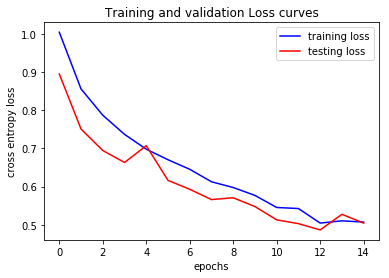

In [36]:
plt.plot(history_record[3].history['loss'],color='b',label='training loss')
plt.plot(history_record[3].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('tail-loss-attention.jpg')
plt.show()

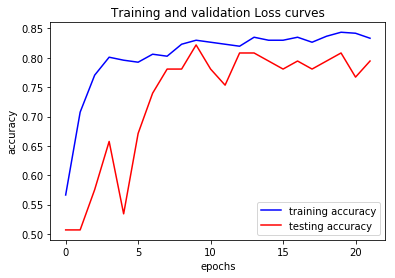

In [27]:
plt.plot(history_record[1].history['sparse_categorical_accuracy'],color='b',label='training accuracy')
plt.plot(history_record[1].history['val_sparse_categorical_accuracy'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('tail-accuracy-attention.jpg')
plt.show()

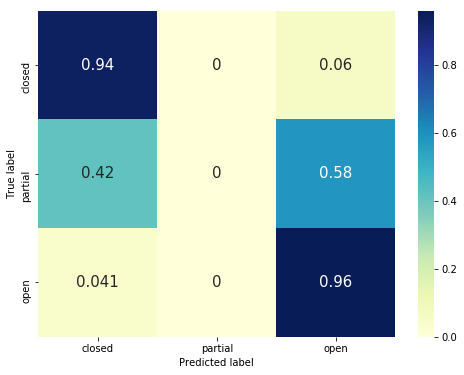

In [39]:
from sklearn.metrics import confusion_matrix

C_sum = np.zeros(3)

for i in range(4):
    with open('data-tail'+str(i+1)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    test_predictions = test_pred[i]
#test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
#test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

    #test_predictions = model.predict(x=np.array(test_images),batch_size=5)
# train_predictions = np.argmax(train_pred[i],axis=1)
# train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# train_accuracy.append(accuracy_score(train_labels,train_predictions))

    C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
    C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(3,1)
confusion_matrix = C_sum/4

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['closed','partial','open'], 
                     columns = ['closed','partial','open'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('tail-confusion-matrix.jpg')
plt.show()

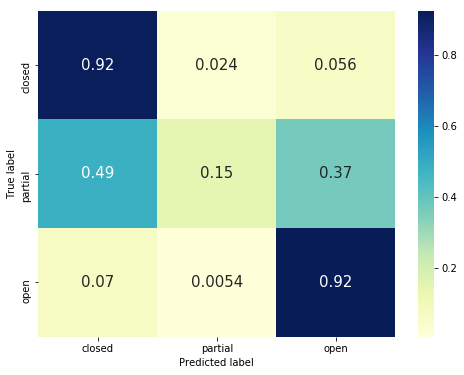

In [42]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(4):
    with open('data-tail'+str(i+1)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification25'+str(i+1)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    test_predictions = test_pred[i]
    test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
    test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))
    
    #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
    train_predictions = np.argmax(train_pred[i],axis=1)
    train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
    train_accuracy.append(accuracy_score(train_labels,train_predictions))

loaded model


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


loaded model
loaded model
loaded model


In [43]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.var(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.var(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.var(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.var(test_f1))

Training accuracy mean 0.8391507626941561
Training accuracy var 1.1658439166580386e-05
Testing accuracy mean 0.8054424287301001
Testing accuracy var 0.00041618685525305634
Training f1 mean 0.6040877899252973
Training f1 var 8.406263713869898e-07
Testing f1 mean 0.5810852009714397
Testing f1 var 0.0002839514756668831


In [295]:
train_accuracy
# idx = idx + 1
# #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# plt.imshow(test_images[idx])
# print(test_labels[idx])
# #train_labels[idx]
# #train_predictions[idx]

[0.9744027303754266,
 0.9795221843003413,
 0.9829931972789115,
 0.9914965986394558,
 0.9880952380952381]

In [11]:
labels = 3
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False
x = cnn_base.get_layer('block5_pool').output
x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = Dropout(0.4)(x)
x = Dense(64,activation='tanh')(x)
x = Dropout(0.4)(x)
x = Dense(labels,activation='softmax')(x)


model = Model(inputs=cnn_base.input, outputs=x)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['sparse_categorical_accuracy'])
print(model.summary())
initial_weights = model.get_weights()

58892288/58889256 [==============================] - 4s 0us/step


W0325 13:32:56.509871 139679986128640 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []

for i in range(5):
    print("Loading file")
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('tail-classification-simple10'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    from keras.callbacks import EarlyStopping
    earlyStopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.001, patience=12, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    checkpoint = CustomModelCheckpoint('tail-classification-simple10'+str(i)+'.hd5', monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    callbacks_list = [checkpoint,earlyStopping]
    
    print("calculating initial losses")
    initial_train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    initial_test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    
    
    history = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=8,epochs=40,
                           validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,
                       class_weight=class_weights)
    history_record.append(history)
    train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    initial_train_scores.append(train_score)
    initial_test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(train_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    train_pred.append(train_predictions)
    test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
calculating initial losses
74/74 [==============================] - 2s 22ms/step
Train on 586 samples, validate on 74 samples
Epoch 1/40
586/586 [==============================] - 10s 16ms/step - loss: 1.2570 - sparse_categorical_accuracy: 0.4010 - val_loss: 1.1028 - val_sparse_categorical_accuracy: 0.5000

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.50000, saving model to tail-classification-simple100.hd5
asd
Epoch 2/40
586/586 [==============================] - 8s 14ms/step - loss: 1.1457 - sparse_categorical_accuracy: 0.4744 - val_loss: 0.9215 - val_sparse_categorical_accuracy: 0.6351

Epoch 00002: val_sparse_categorical_accuracy improved from 0.50000 to 0.63514, saving model to tail-classification-simple100.hd5
asd
Epoch 3/40
586/586 [==============================] - 8s 14ms/step - loss: 1.0180 - sparse_categorical_accuracy: 0.5648 - val_loss: 0.8042 - val_sparse_categorical_accuracy: 0.6892

Epoch 00003: val_spa

586/586 [==============================] - 8s 14ms/step - loss: 1.1003 - sparse_categorical_accuracy: 0.4249 - val_loss: 1.0140 - val_sparse_categorical_accuracy: 0.5000

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.50000
Epoch 8/40
586/586 [==============================] - 8s 14ms/step - loss: 1.0936 - sparse_categorical_accuracy: 0.4232 - val_loss: 1.0276 - val_sparse_categorical_accuracy: 0.5000

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.50000
Epoch 9/40
586/586 [==============================] - 8s 14ms/step - loss: 1.0652 - sparse_categorical_accuracy: 0.4488 - val_loss: 1.0124 - val_sparse_categorical_accuracy: 0.5000

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.50000
Epoch 10/40
586/586 [==============================] - 8s 14ms/step - loss: 1.0515 - sparse_categorical_accuracy: 0.4710 - val_loss: 1.0258 - val_sparse_categorical_accuracy: 0.5000

Epoch 00010: val_sparse_categorical_accuracy did not improve

Epoch 5/40
588/588 [==============================] - 8s 14ms/step - loss: 0.9867 - sparse_categorical_accuracy: 0.5629 - val_loss: 0.7870 - val_sparse_categorical_accuracy: 0.7945

Epoch 00005: val_sparse_categorical_accuracy improved from 0.76712 to 0.79452, saving model to tail-classification-simple104.hd5
asd
Epoch 6/40
588/588 [==============================] - 8s 14ms/step - loss: 1.1627 - sparse_categorical_accuracy: 0.4099 - val_loss: 0.9015 - val_sparse_categorical_accuracy: 0.5068

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.79452
Epoch 7/40
588/588 [==============================] - 8s 14ms/step - loss: 1.0146 - sparse_categorical_accuracy: 0.5408 - val_loss: 0.7869 - val_sparse_categorical_accuracy: 0.8082

Epoch 00007: val_sparse_categorical_accuracy improved from 0.79452 to 0.80822, saving model to tail-classification-simple104.hd5
asd
Epoch 8/40
588/588 [==============================] - 8s 14ms/step - loss: 0.9261 - sparse_categorical_accuracy: 0

In [13]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification-simple10'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    test_predictions = test_pred[i]
    test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
    test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))
    
    #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
    train_predictions = np.argmax(train_pred[i],axis=1)
    #train_predictions = np.argmax(train_predictions,axis=1)
    train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
    train_accuracy.append(accuracy_score(train_labels,train_predictions))

loaded model


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


loaded model
loaded model
loaded model
loaded model


In [14]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.var(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.var(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.var(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.var(test_f1))

Training accuracy mean 0.6849144435931369
Training accuracy var 0.02199513778862793
Testing accuracy mean 0.6706405035172158
Testing accuracy var 0.020417484933316205
Training f1 mean 0.43716290488172493
Training f1 var 0.03056326890924982
Testing f1 mean 0.4283613895791737
Testing f1 var 0.0288043580718275


In [348]:
train_accuracy

[0.8361774744027304,
 0.7952218430034129,
 0.3401360544217687,
 0.5034013605442177,
 0.7993197278911565]

In [349]:
test_accuracy

[0.7837837837837838,
 0.7972972972972973,
 0.5068493150684932,
 0.5068493150684932,
 0.8493150684931506]

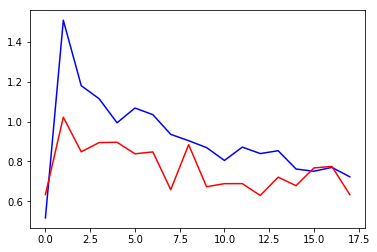

In [435]:
plt.plot([initial_train_scores[0][0]] + history.history['loss'],color='b')
plt.plot([initial_test_scores[0][0]] + history.history['val_loss'],color='r')

[1.1190550060809268, 0.37030717628807747]

loaded model
loaded model
loaded model
loaded model
loaded model


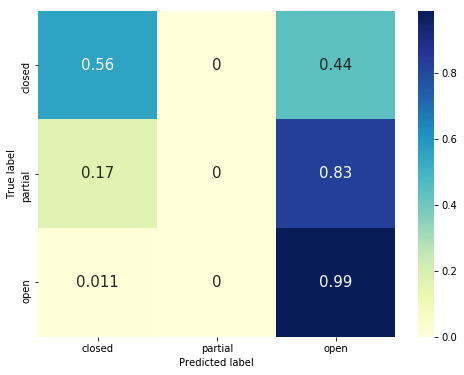

In [478]:
from sklearn.metrics import confusion_matrix

C_sum = np.zeros(3)

for i in range(5):
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification-simple5'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
#test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
#test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

#train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# train_predictions = np.argmax(train_pred[i],axis=1)
# train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# train_accuracy.append(accuracy_score(train_labels,train_predictions))
    test_predictions = model.predict(x=np.array(test_images),batch_size=5)
    C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
    C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(3,1)
confusion_matrix = C_sum/5

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['closed','partial','open'], 
                     columns = ['closed','partial','open'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('tail-confusion-matrix.jpg')
plt.show()

In [4]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 1.0MB/s ta 0:00:01
